# Weather Data Exploration

This notebook performs analysis on the first 2016 rows of the weather.csv file, skipping the 'date' and 'OT' columns.

## Analyses:
1. Time-Series Line Charts (One Chart per Variable)
2. Rolling Average (24-Sample i.e. 4 hrs Window)
3. Histogram (Distribution)
4. Box Plot (Variability)
5. Scatter Plot (Correlation: Temperature vs RH and other correlated variables)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [23]:
!pip install statsmodels scikit-learn

In [16]:
# Load data
df = pd.read_csv('/content/PatchTST/datasets/weather/weather.csv')
df = df.iloc[:2016].drop(['date', 'OT'], axis=1)
print(f"Data shape: {df.shape}")
print("Columns:", list(df.columns))
df.head()

Data shape: (2016, 20)
Columns: ['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)', 'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)', 'wd (deg)', 'rain (mm)', 'raining (s)', 'SWDR (W/m�)', 'PAR (�mol/m�/s)', 'max. PAR (�mol/m�/s)', 'Tlog (degC)']


p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  VPmax (mbar)  \
0   1008.89      0.71    273.18        -1.33    86.1          6.43   
1   1008.76      0.75    273.22        -1.44    85.2          6.45   
2   1008.66      0.73    273.21        -1.48    85.1          6.44   
3   1008.64      0.37    272.86        -1.64    86.3          6.27   
4   1008.61      0.33    272.82        -1.50    87.4          6.26   

   VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  rho (g/m**3)  \
0          5.54          0.89       3.42             5.49       1280.62   
1          5.49          0.95       3.39             5.45       1280.33   
2          5.48          0.96       3.39             5.43       1280.29   
3          5.41          0.86       3.35             5.37       1281.97   
4          5.47          0.79       3.38             5.42       1282.08   

   wv (m/s)  max. wv (m/s)  wd (deg)  rain (mm)  raining (s)  SWDR (W/m�)  \
0      1.02           1.60     224.3        0.0          0.0          0.0   
1      0.43           0.84     206.8        0.0          0.0          0.0   
2      0.61           1.48     197.1        0.0          0.0          0.0   
3      1.11           1.48     206.4        0.0          0.0          0.0   
4      0.49           1.40     209.6        0.0          0.0          0.0   

   PAR (�mol/m�/s)  max. PAR (�mol/m�/s)  Tlog (degC)  
0              0.0                   0.0        11.45  
1              0.0                   0.0        11.51  
2              0.0                   0.0        11.60  
3              0.0                   0.0        11.70  
4              0.0                   0.0        11.81

## 1. Time-Series Line Charts (One Chart per Variable)

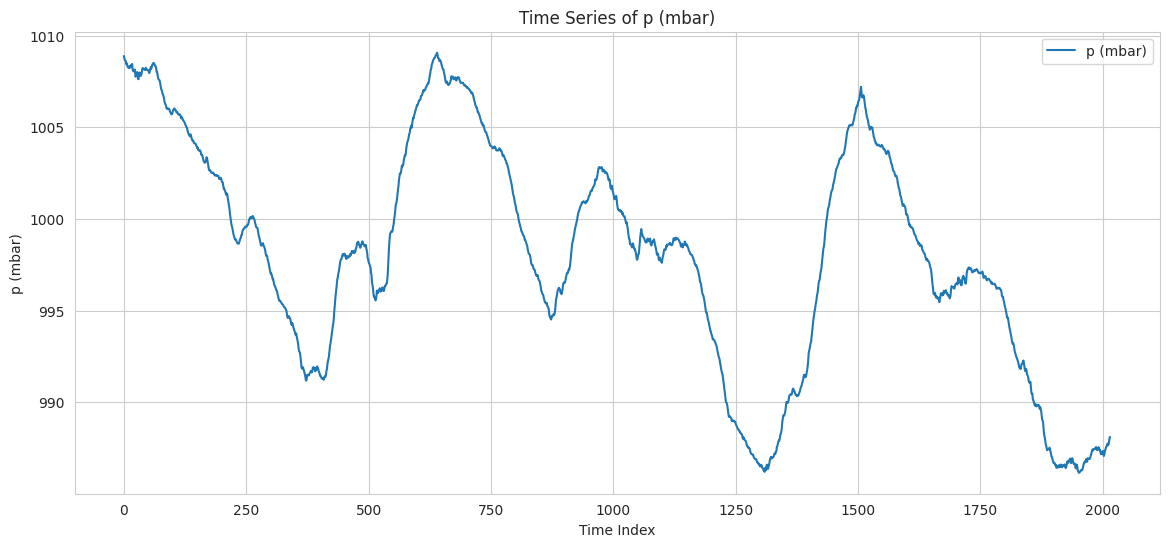

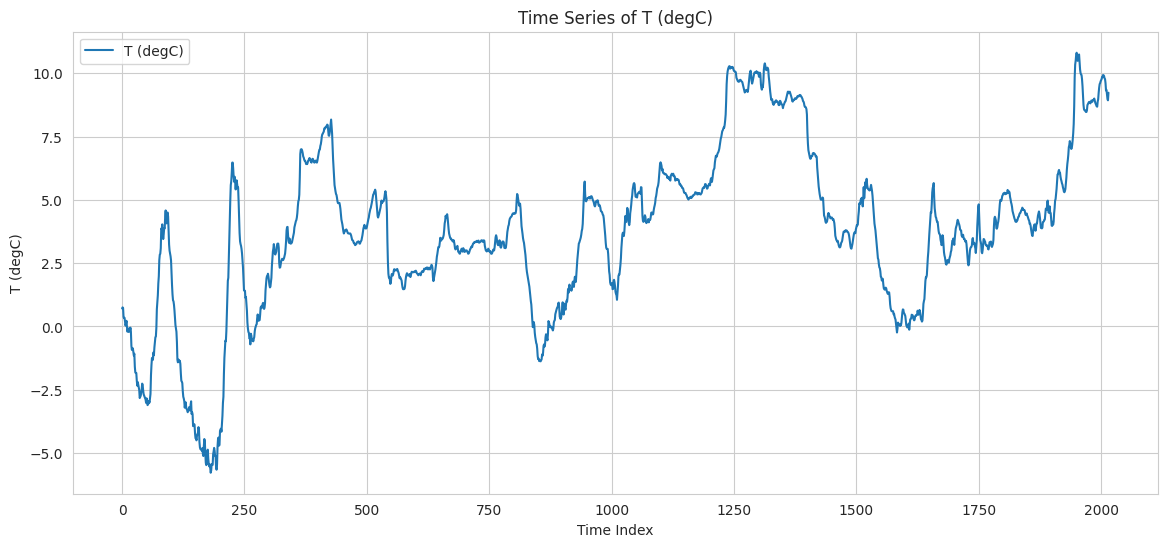

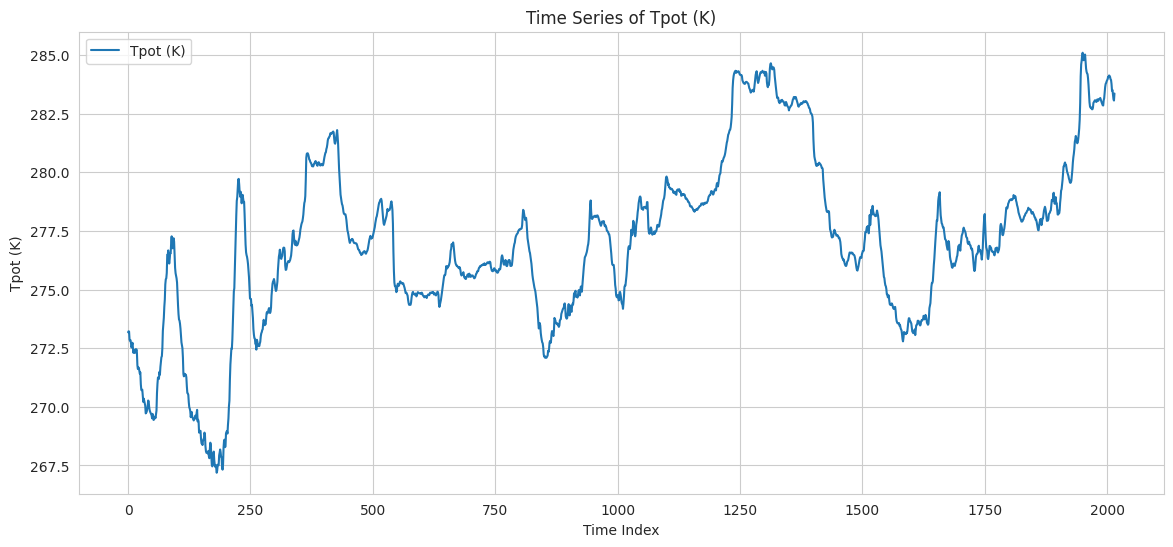

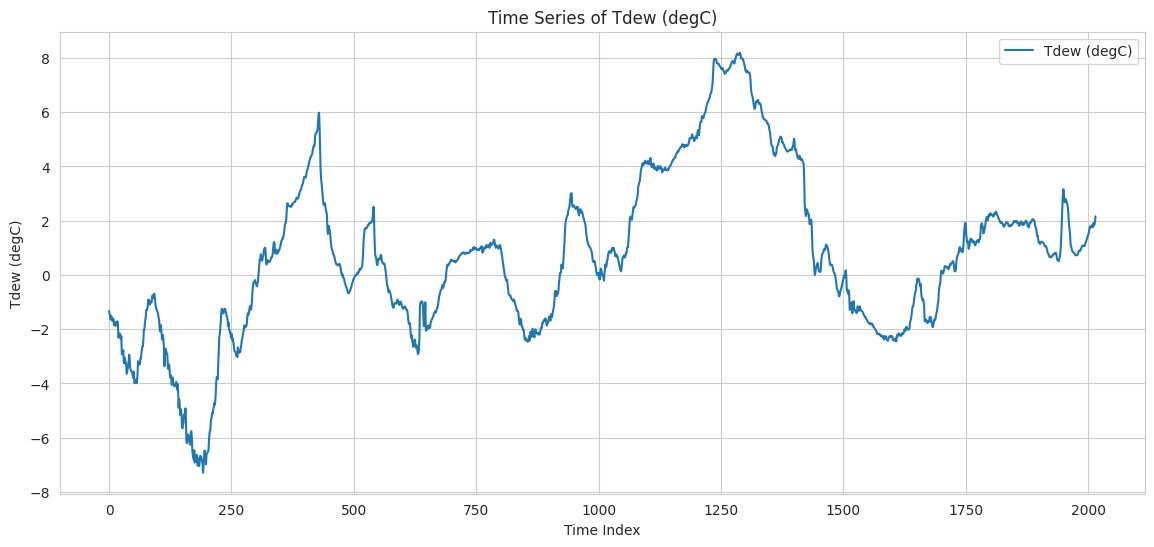

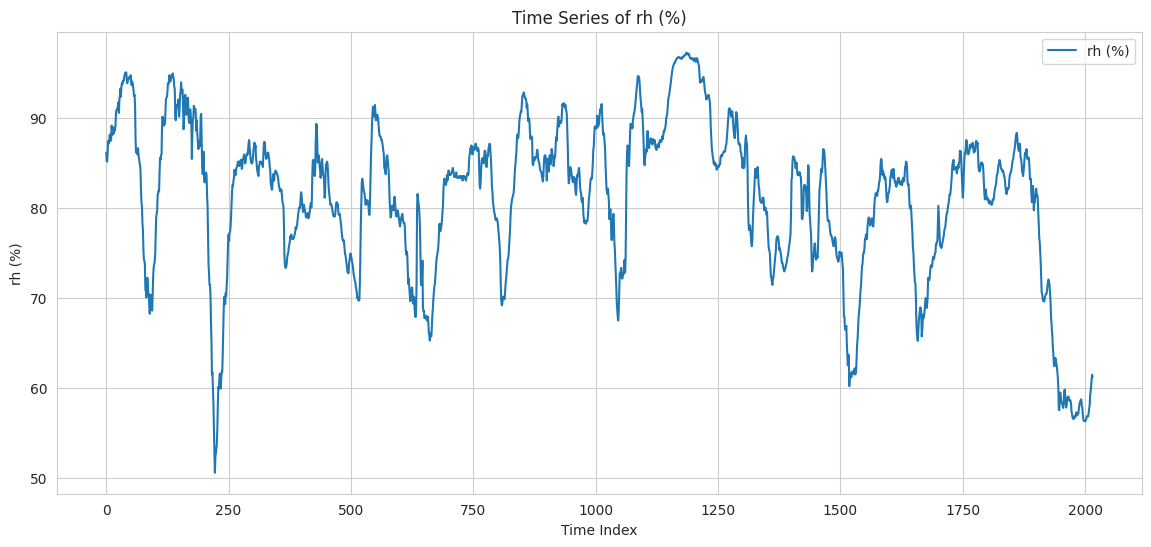

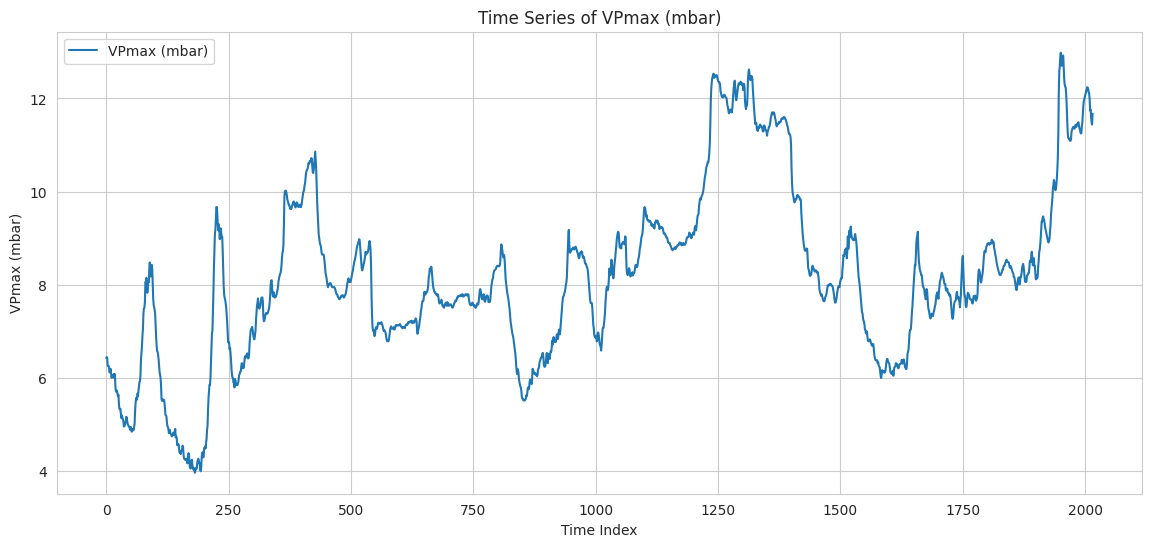

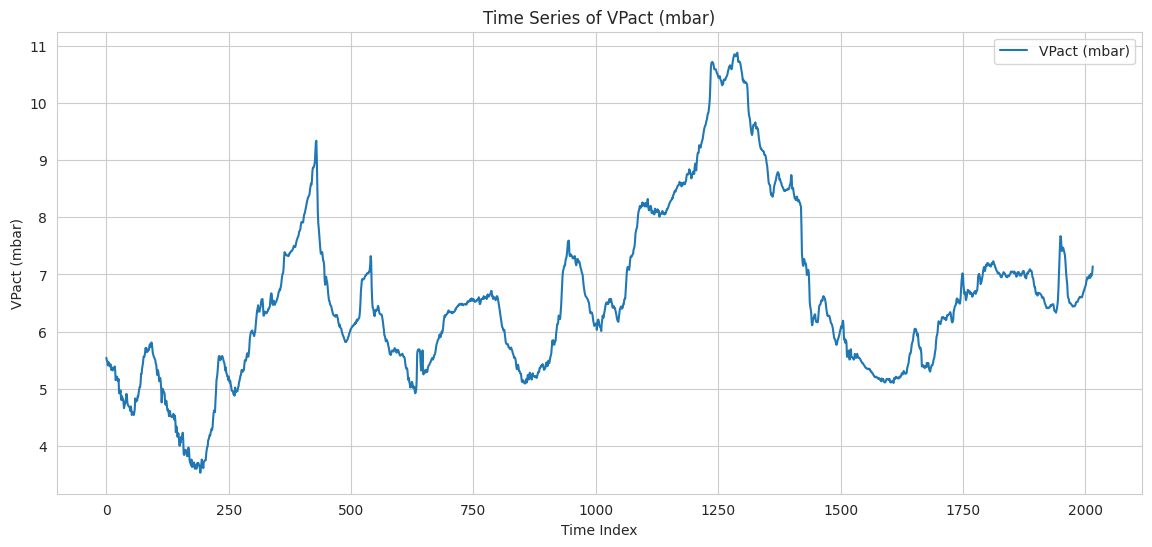

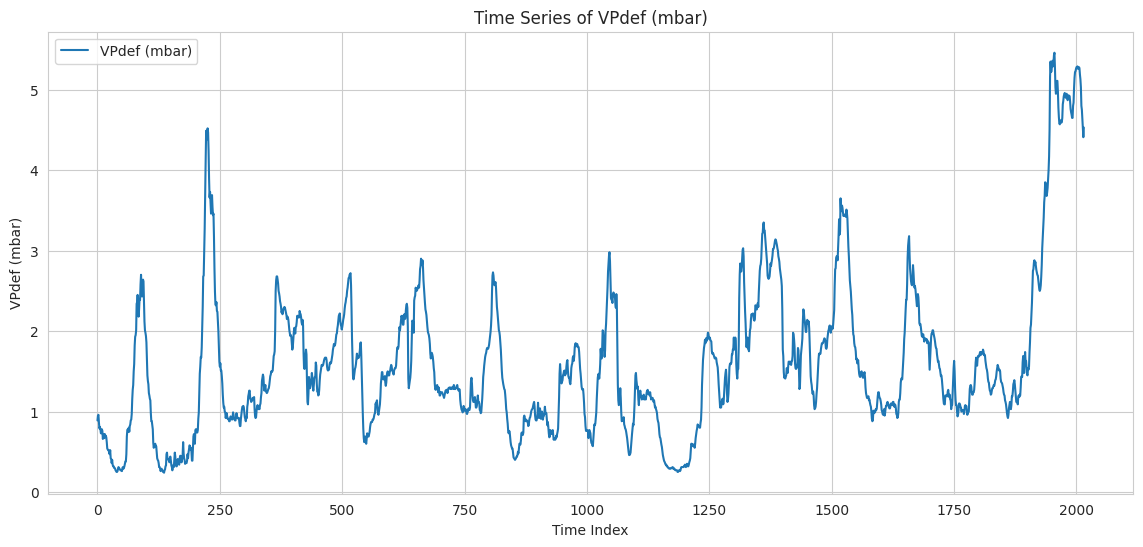

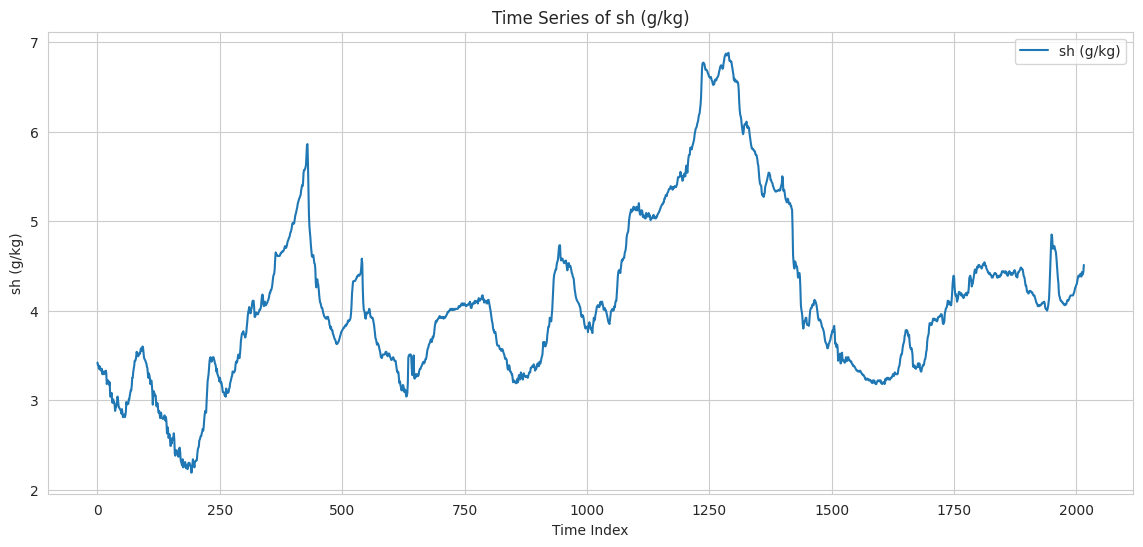

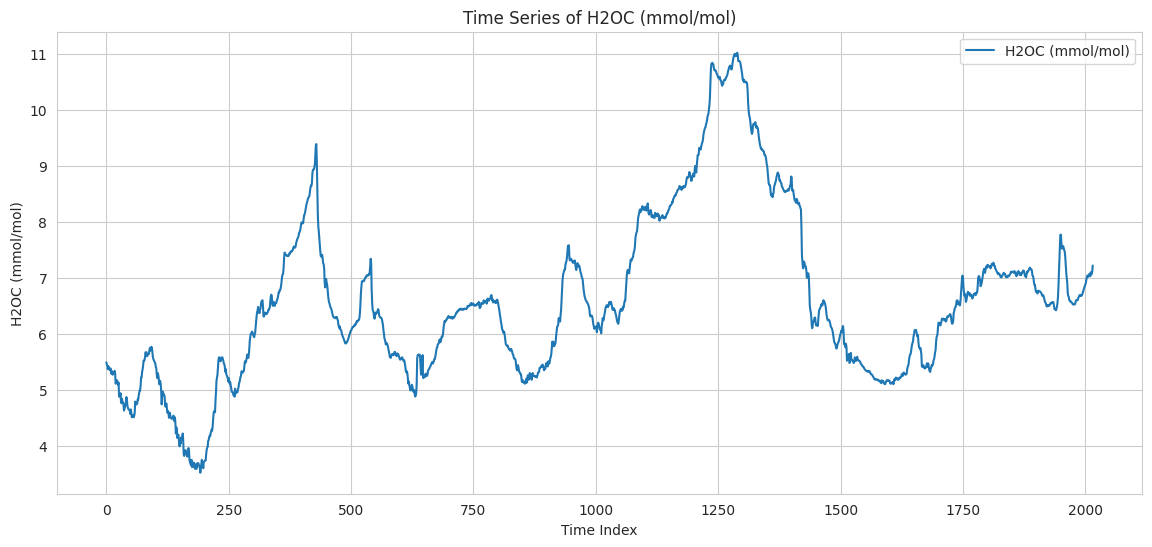

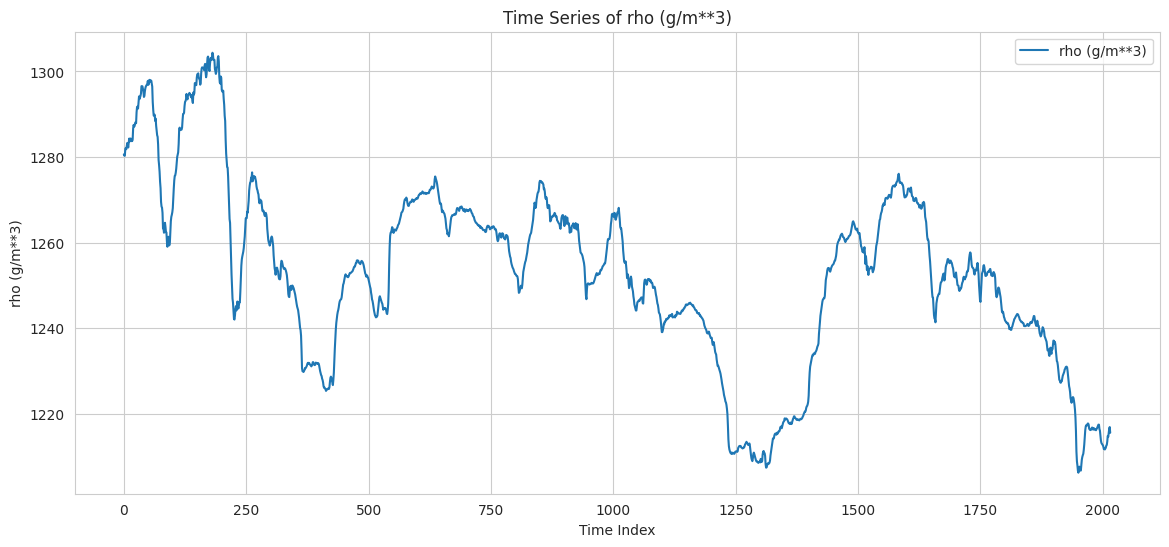

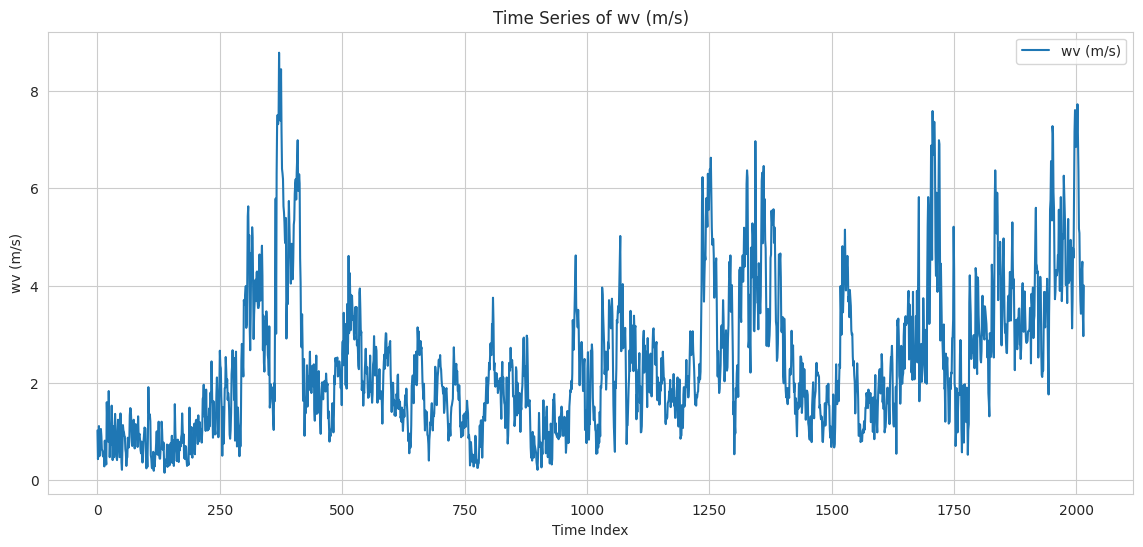

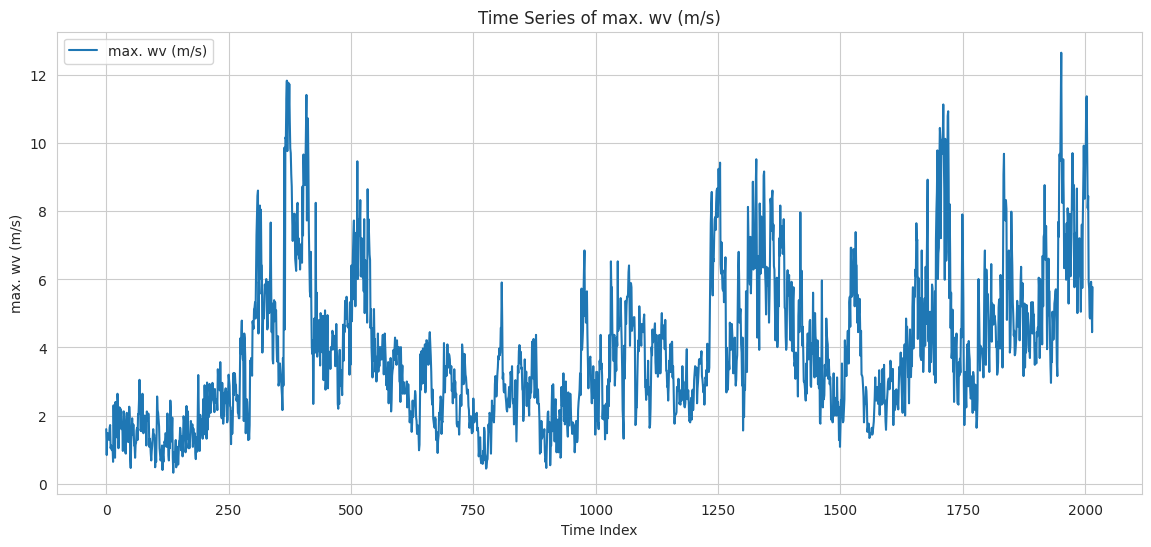

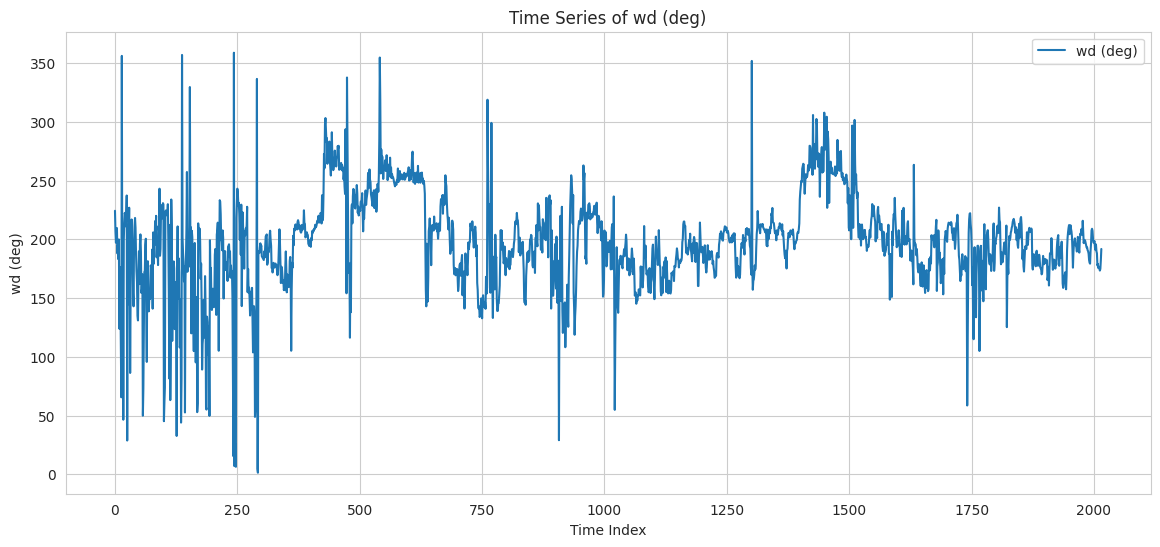

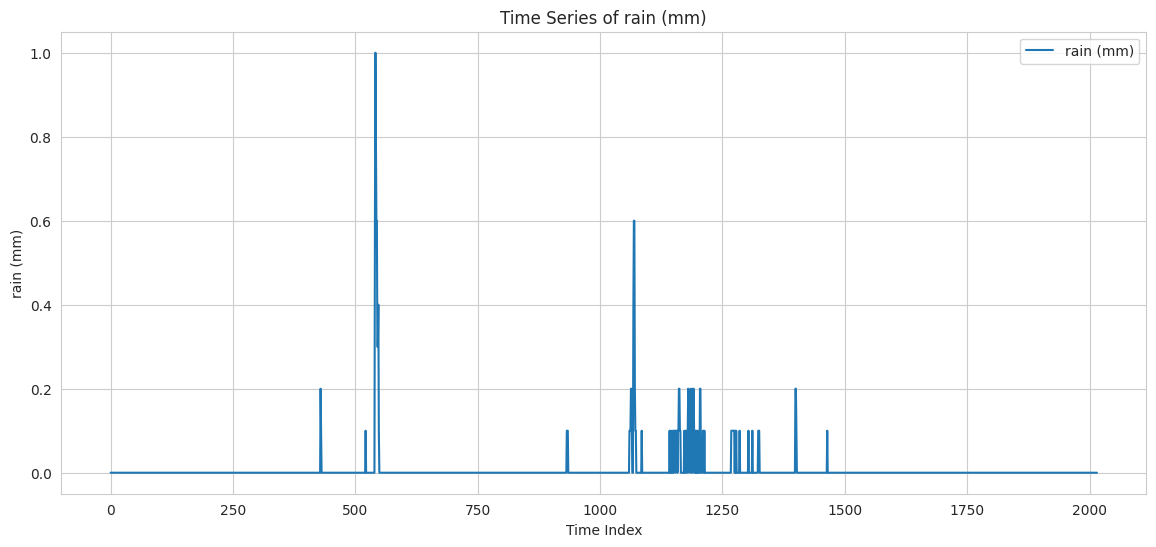

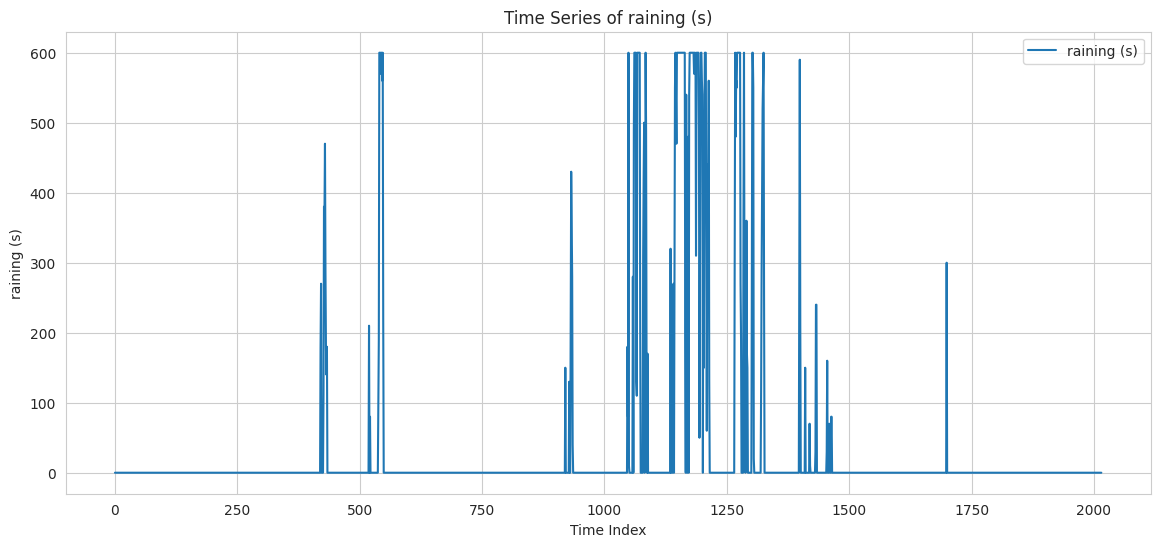

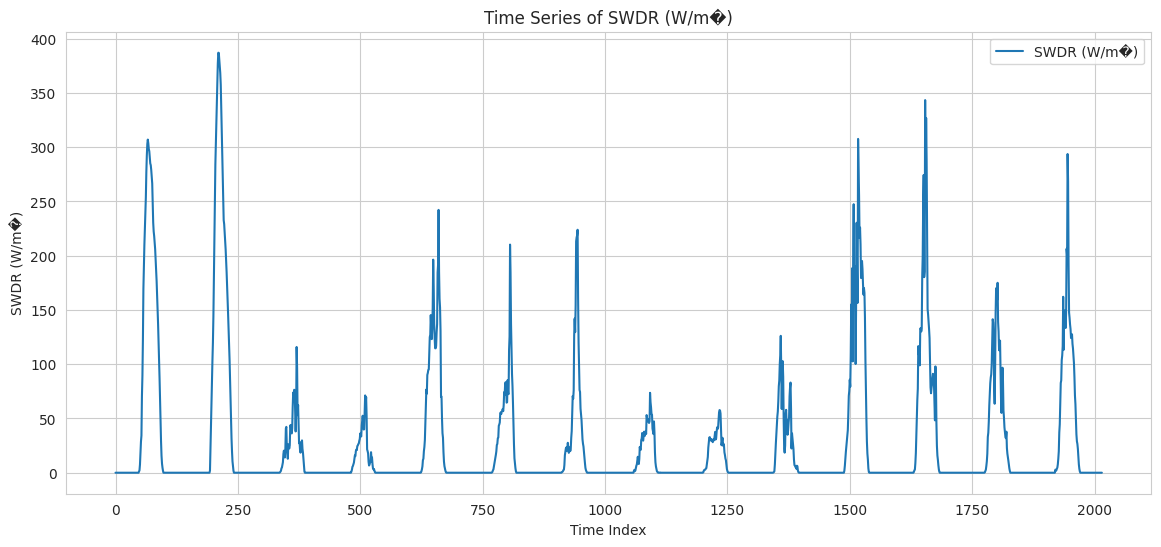

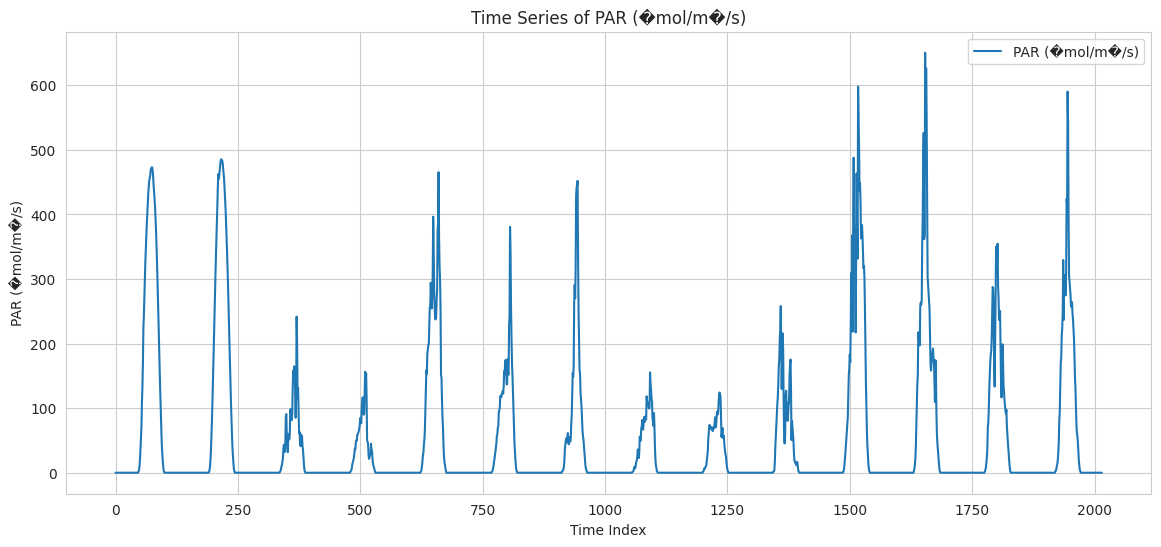

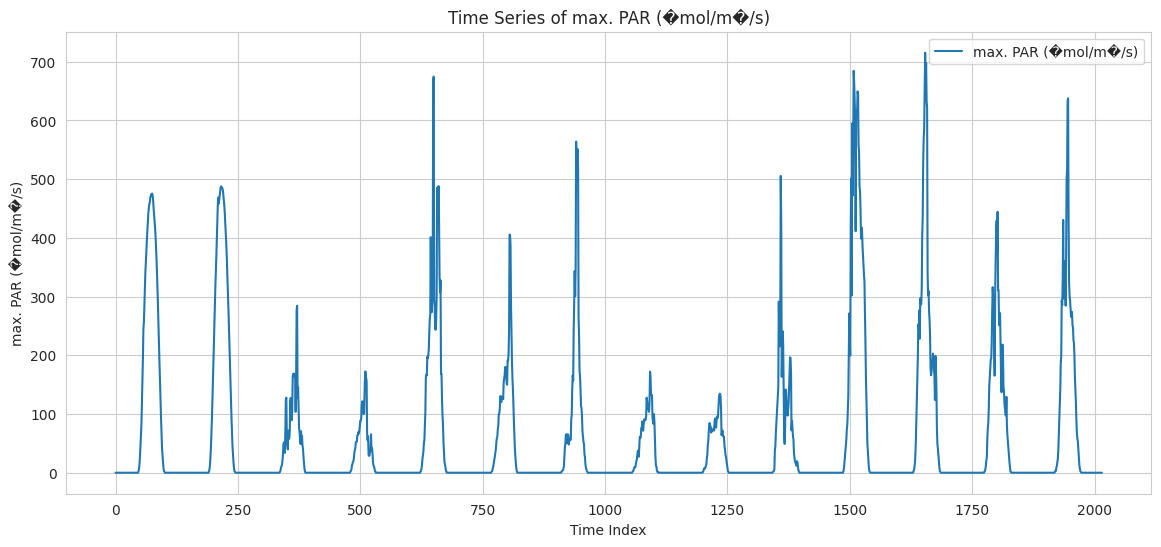

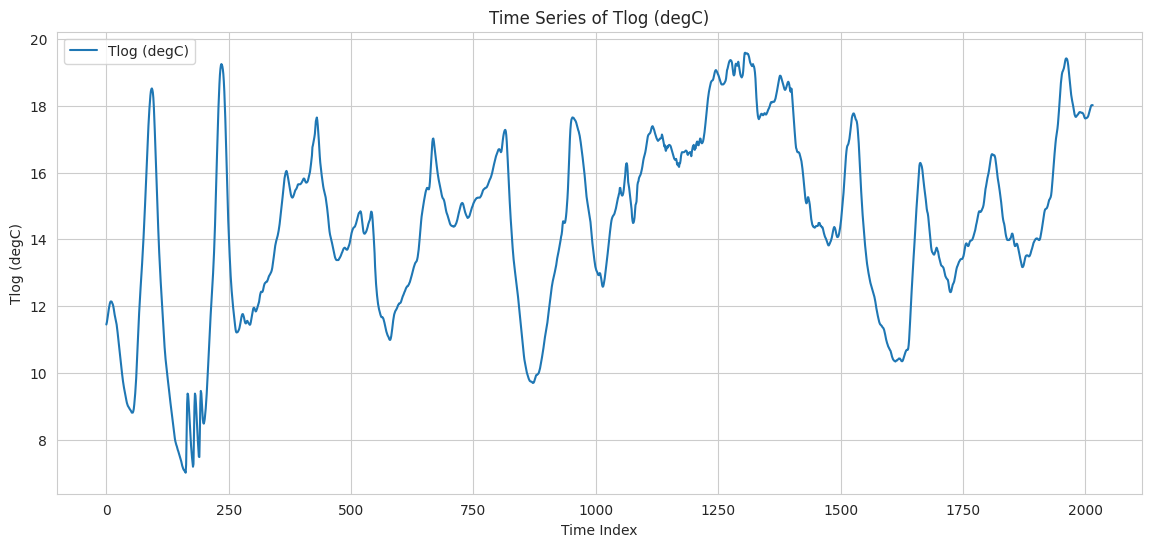

In [17]:
for col in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[col], label=col)
    plt.title(f'Time Series of {col}')
    plt.xlabel('Time Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()

## 2. Rolling Average (24-Sample Window)

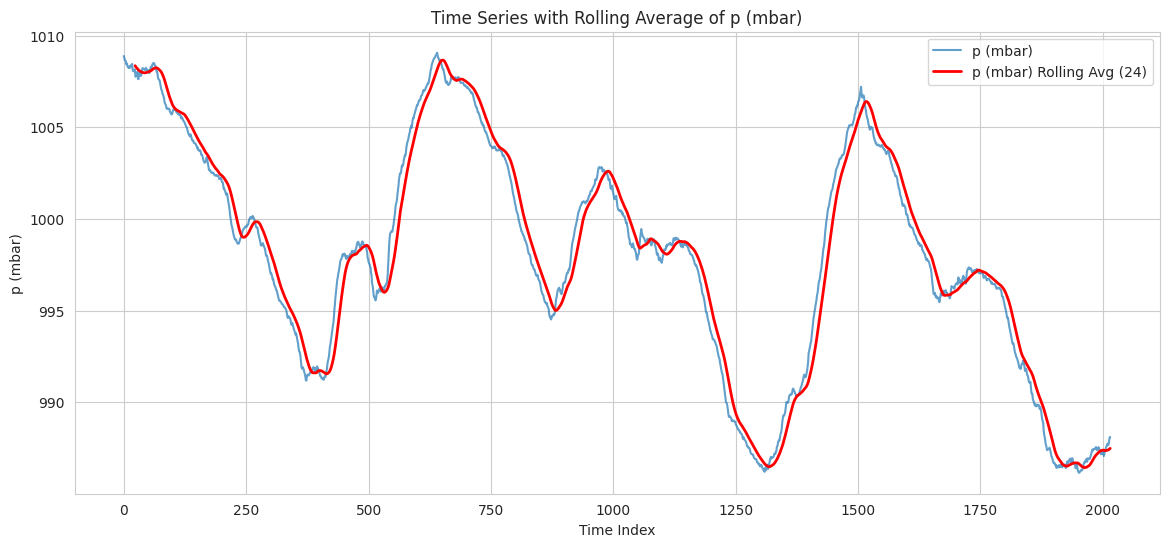

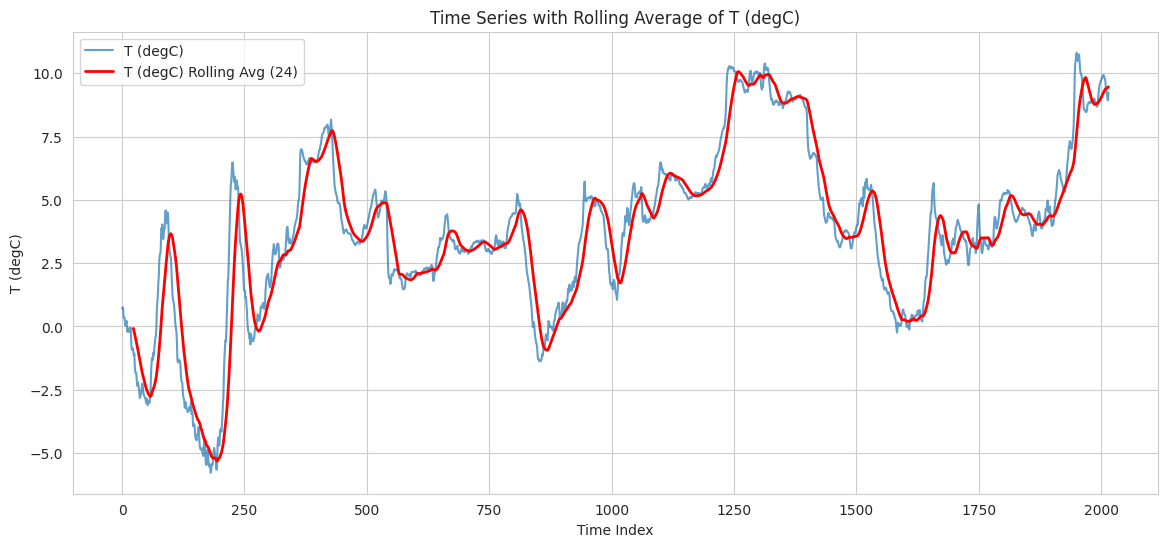

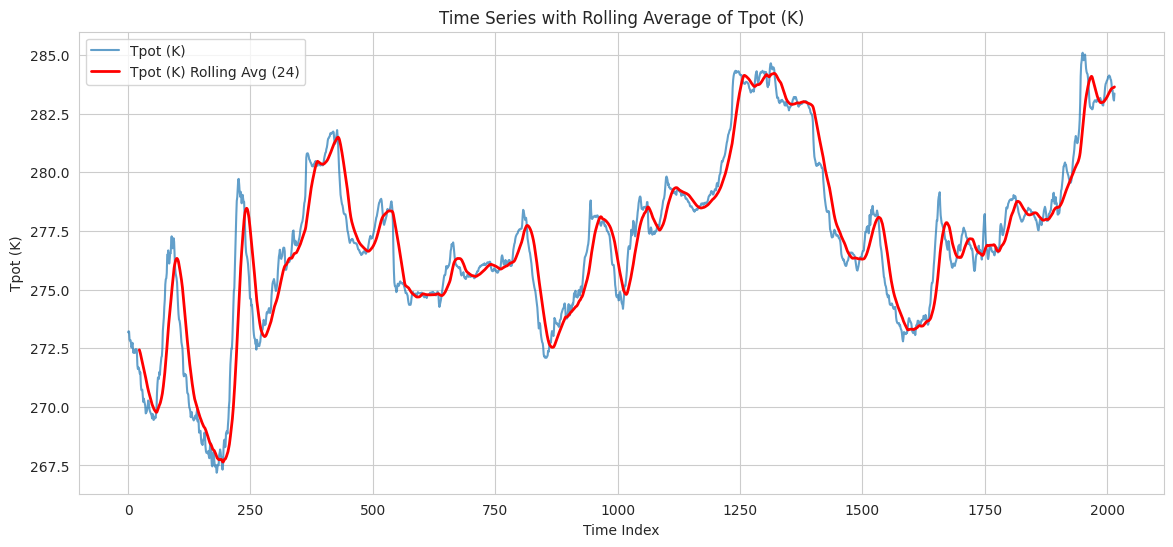

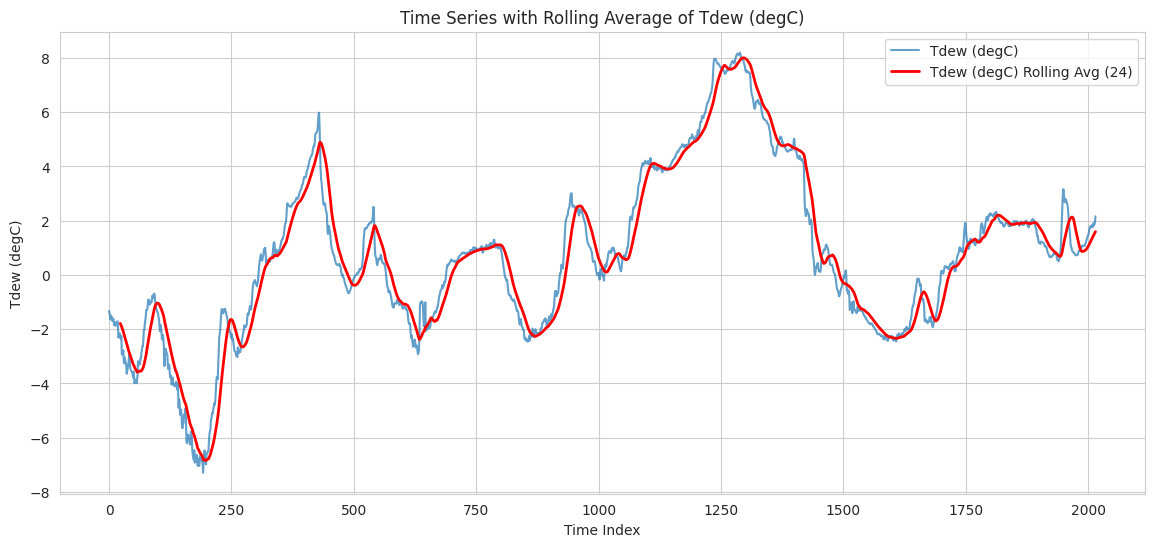

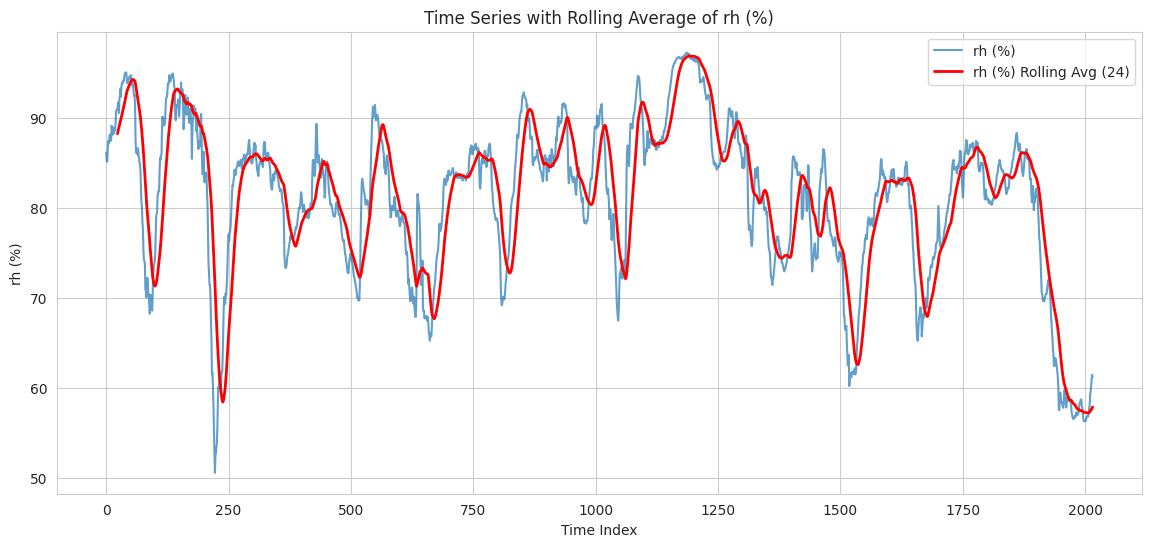

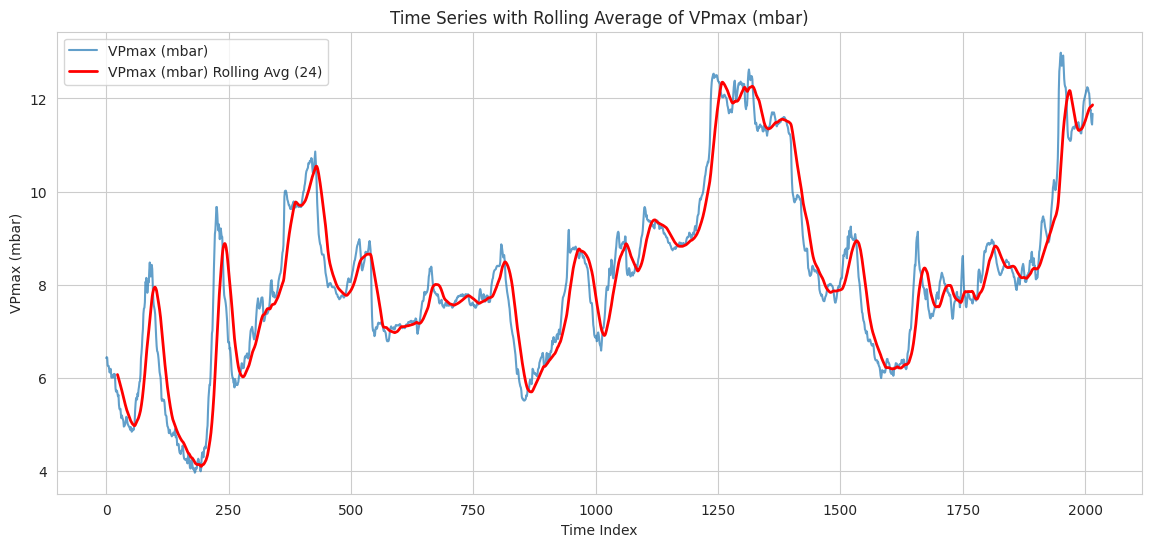

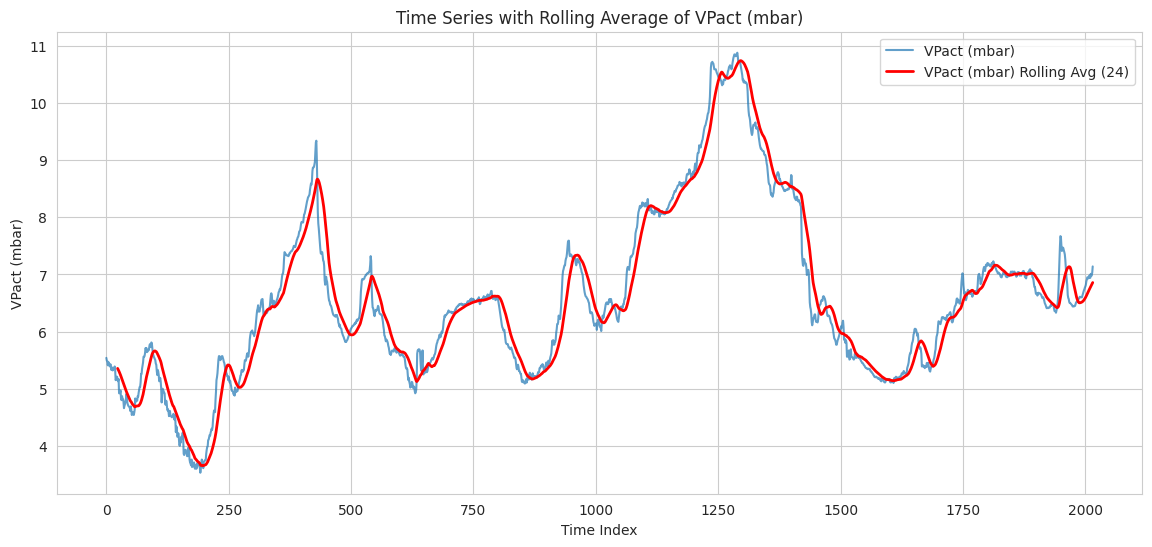

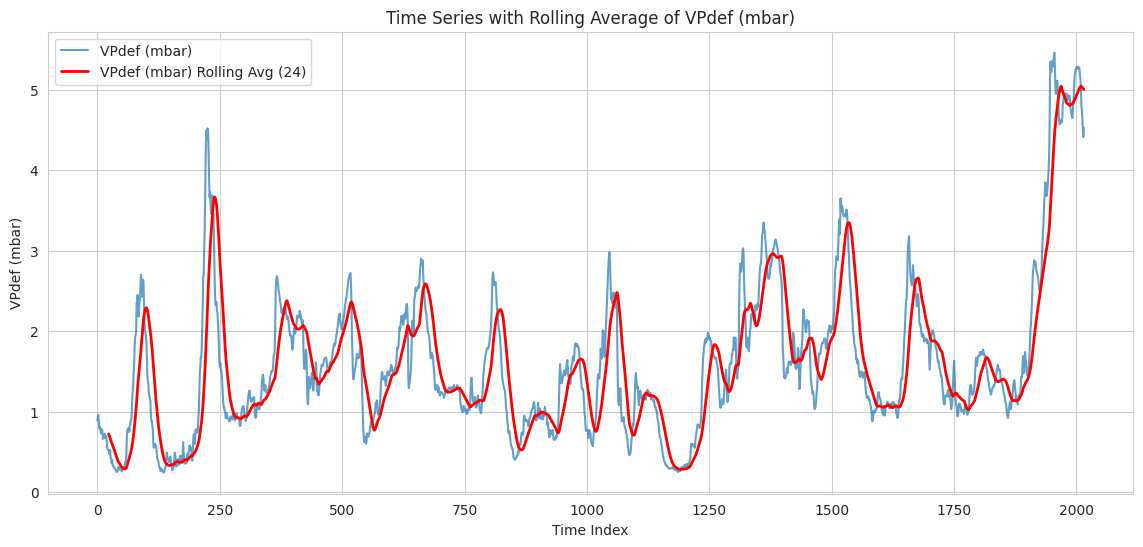

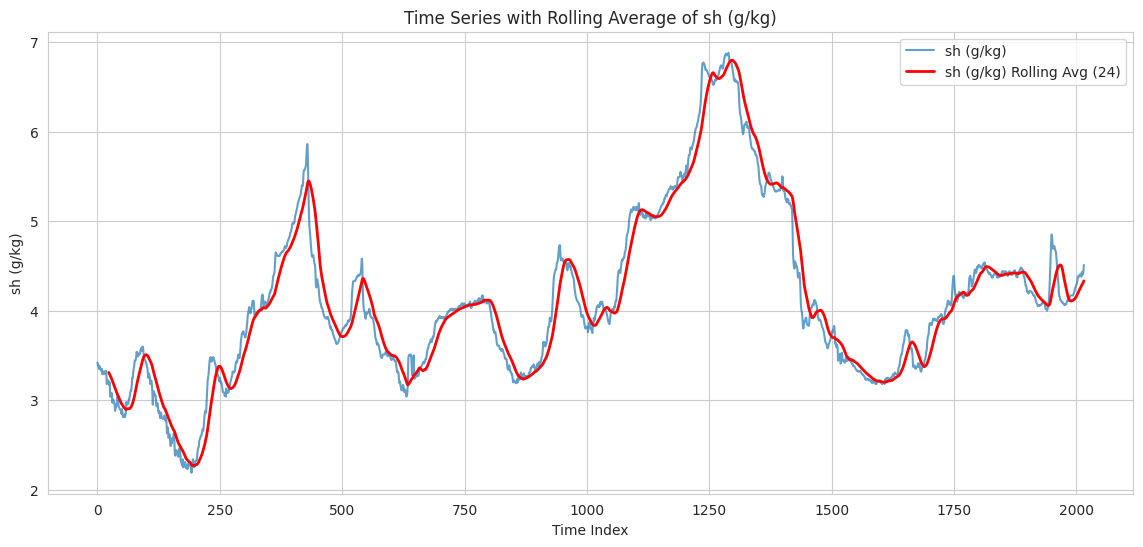

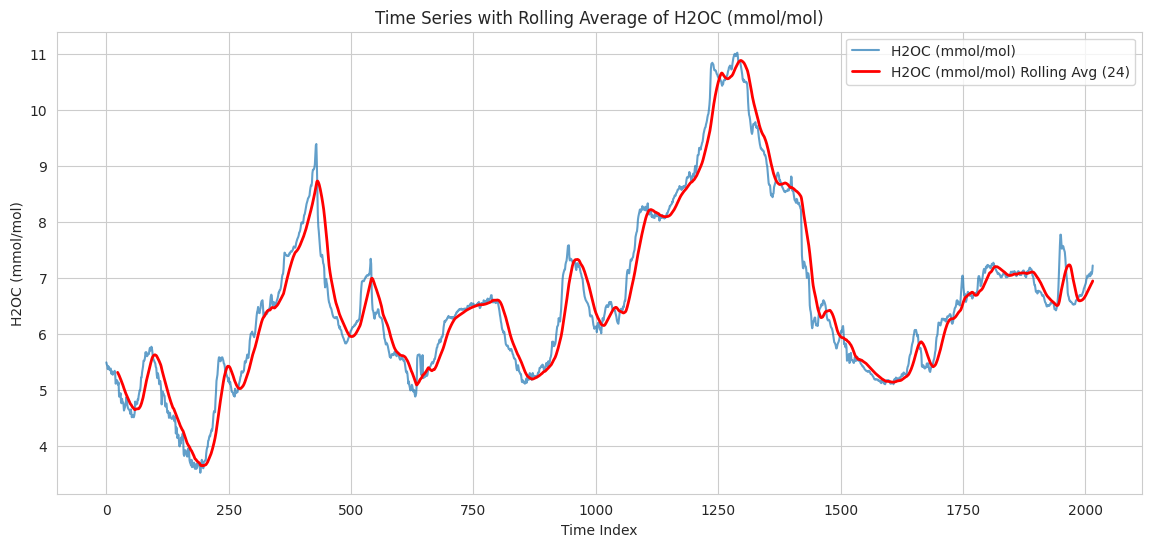

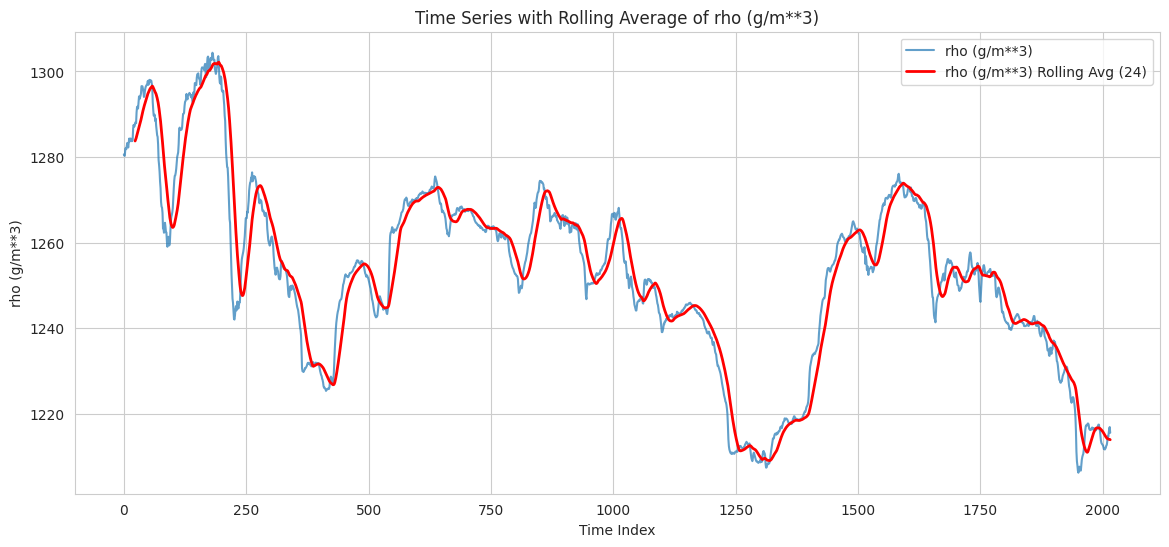

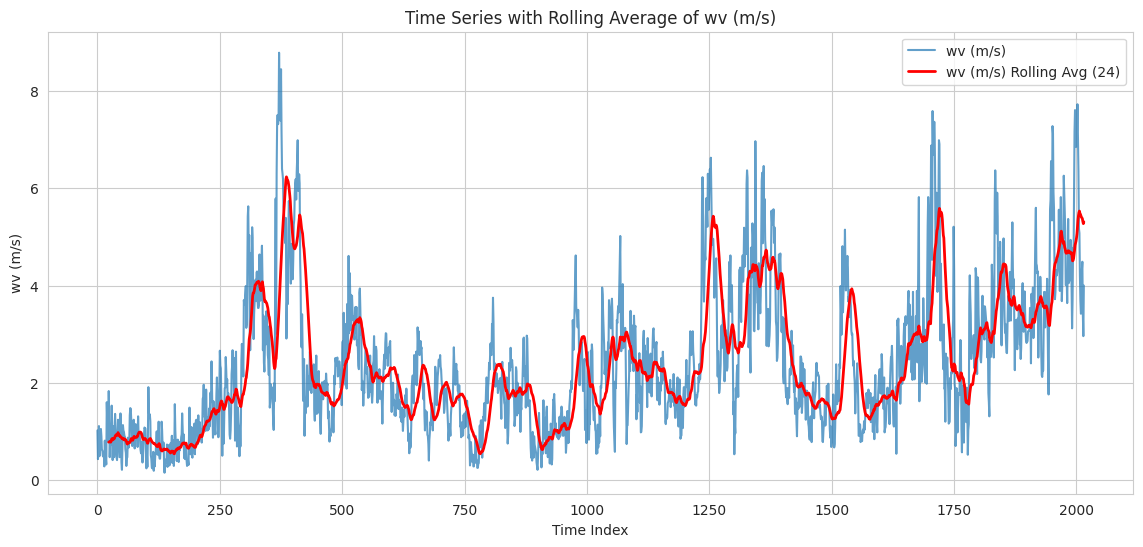

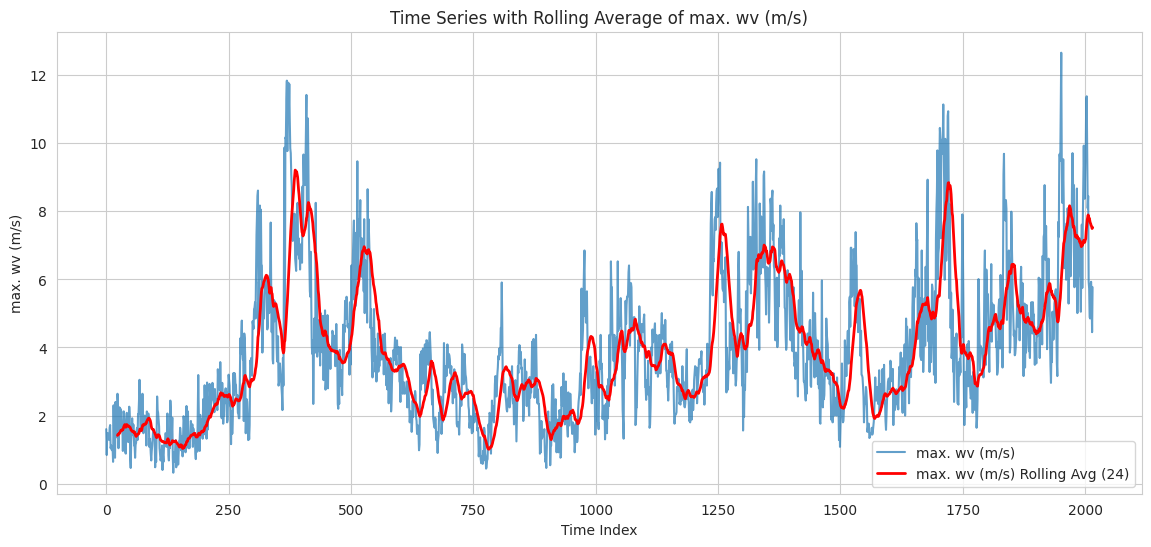

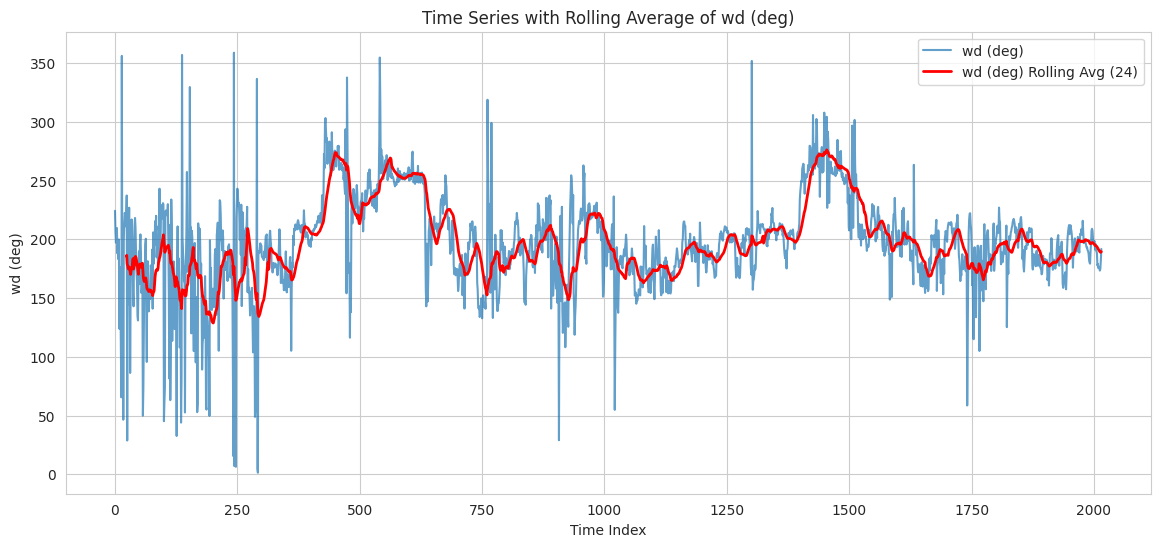

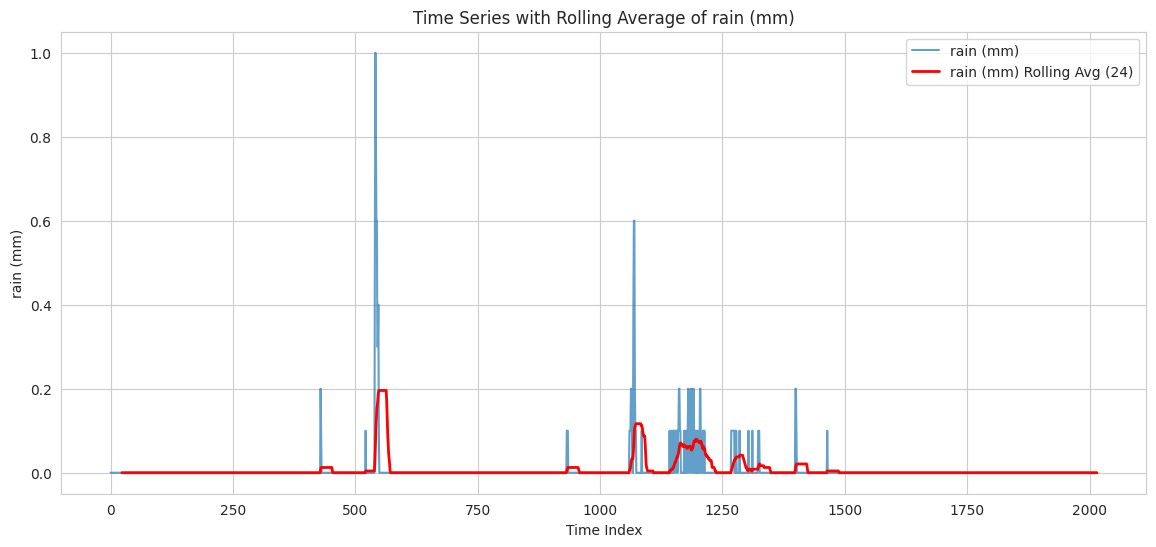

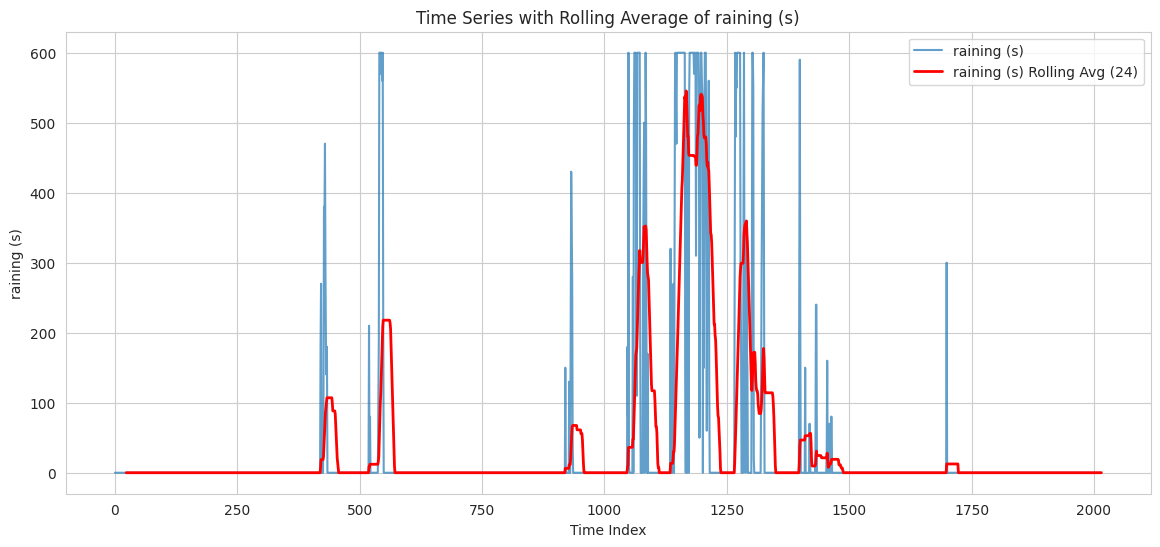

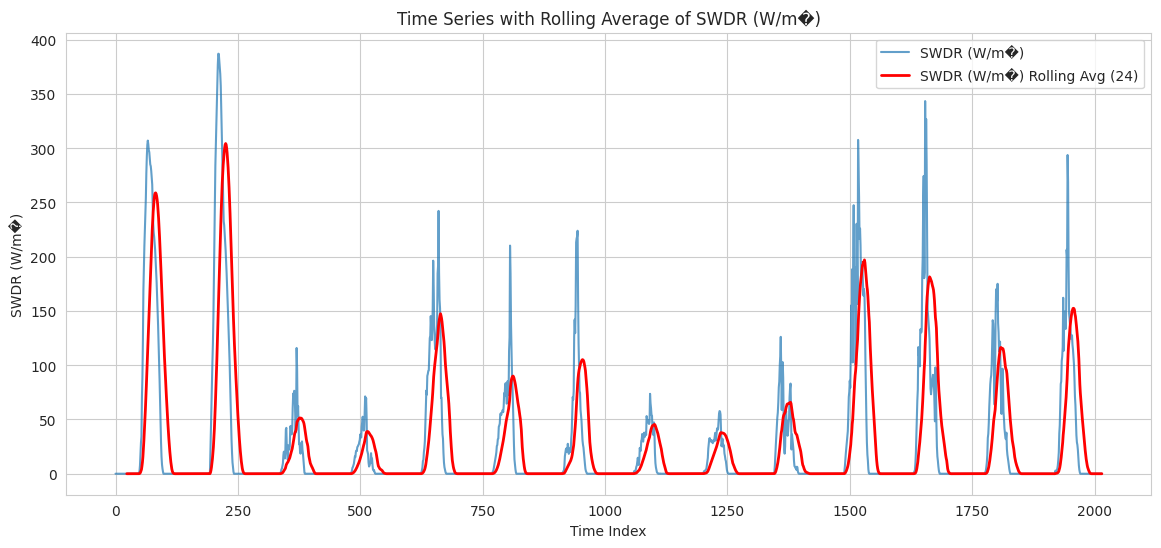

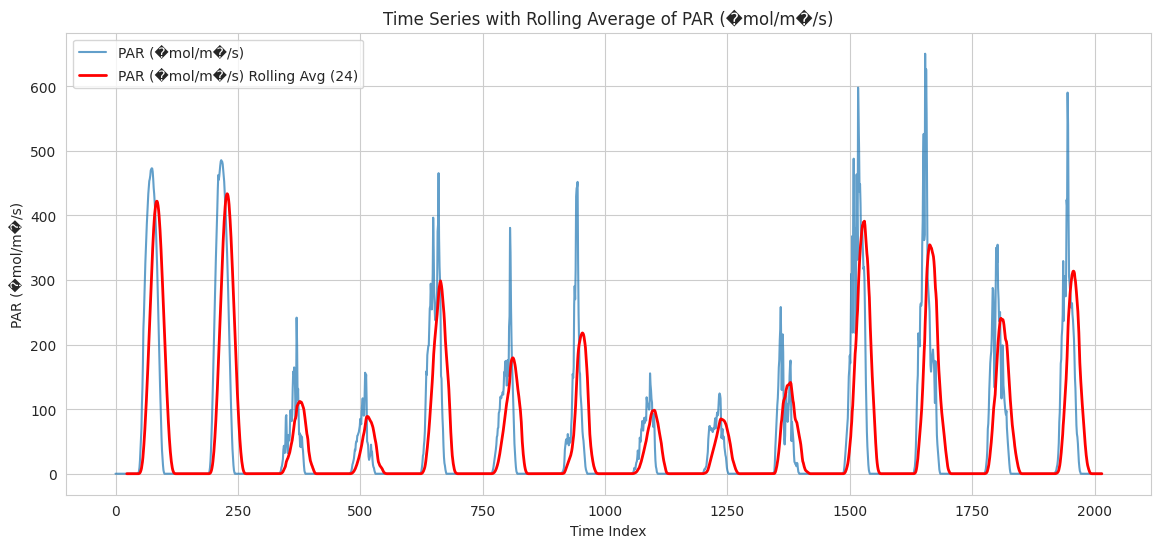

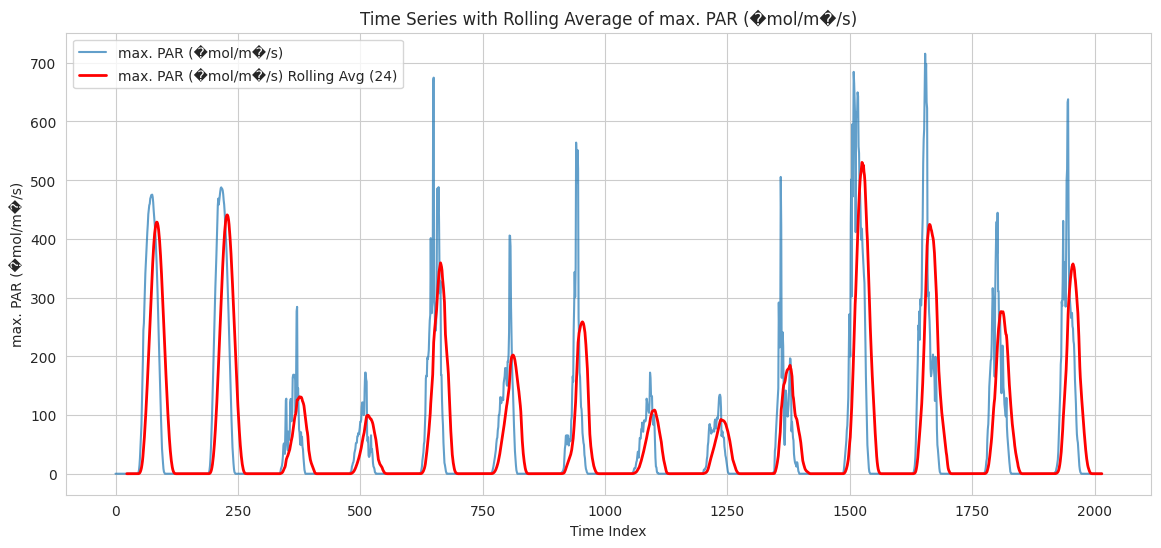

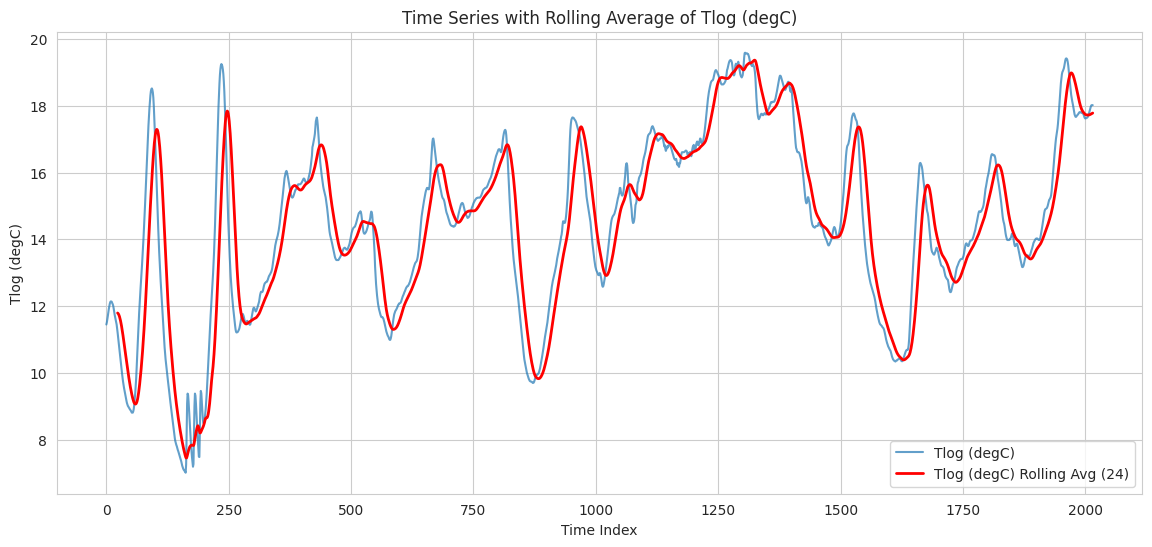

In [18]:
for col in df.columns:
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df[col], label=col, alpha=0.7)
    plt.plot(df.index, df[col].rolling(window=24).mean(), label=f'{col} Rolling Avg (24)', color='red', linewidth=2)
    plt.title(f'Time Series with Rolling Average of {col}')
    plt.xlabel('Time Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()

## 3. Histograms (Distribution)

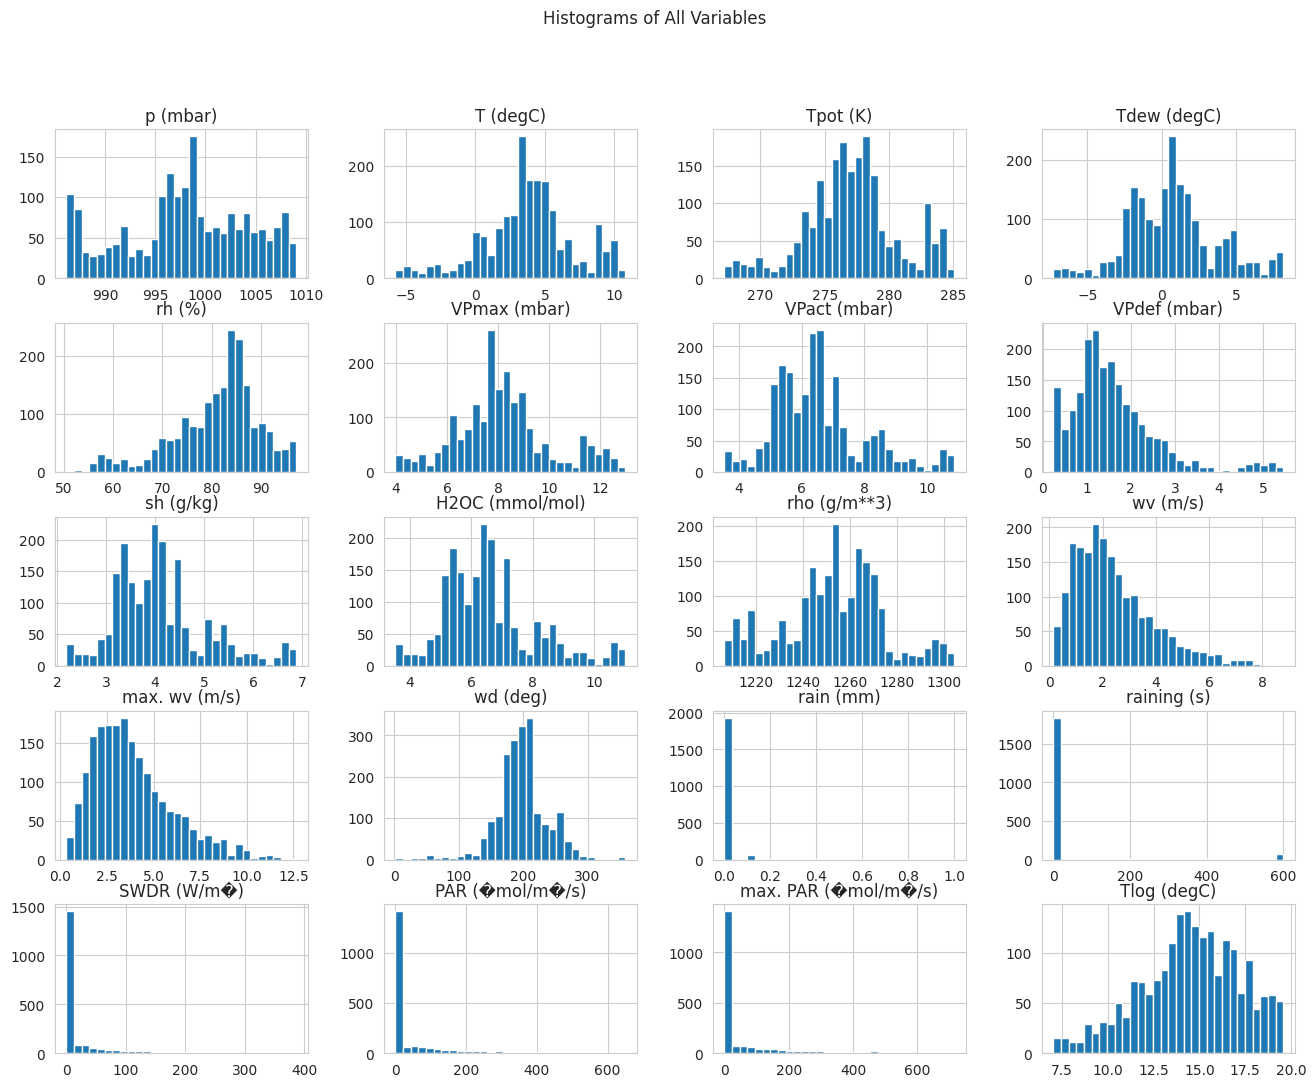

In [19]:
df.hist(figsize=(16, 12), bins=30)
plt.suptitle('Histograms of All Variables')
plt.show()

## 4. Box Plots (Variability)

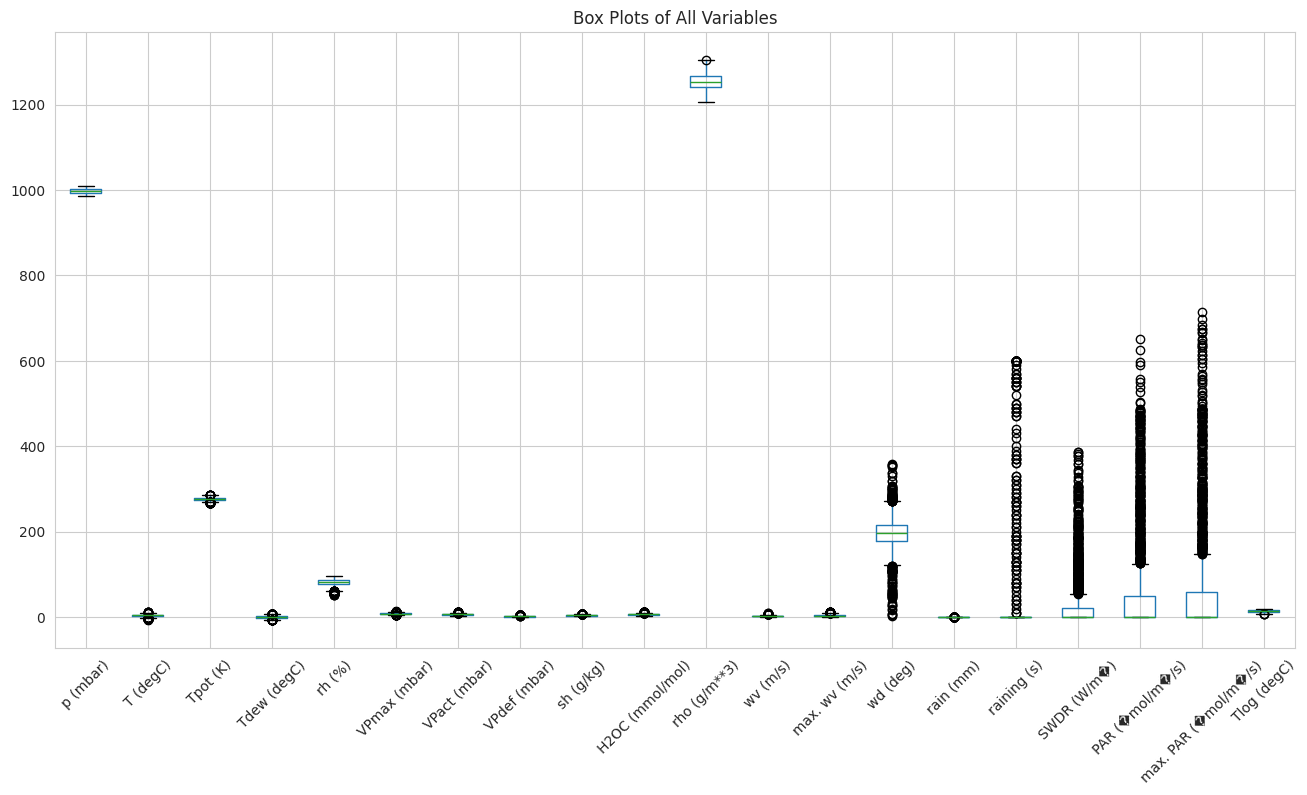

In [20]:
plt.figure(figsize=(16, 8))
df.boxplot(rot=45)
plt.title('Box Plots of All Variables')
plt.show()

## 5. Heatmap Correlation

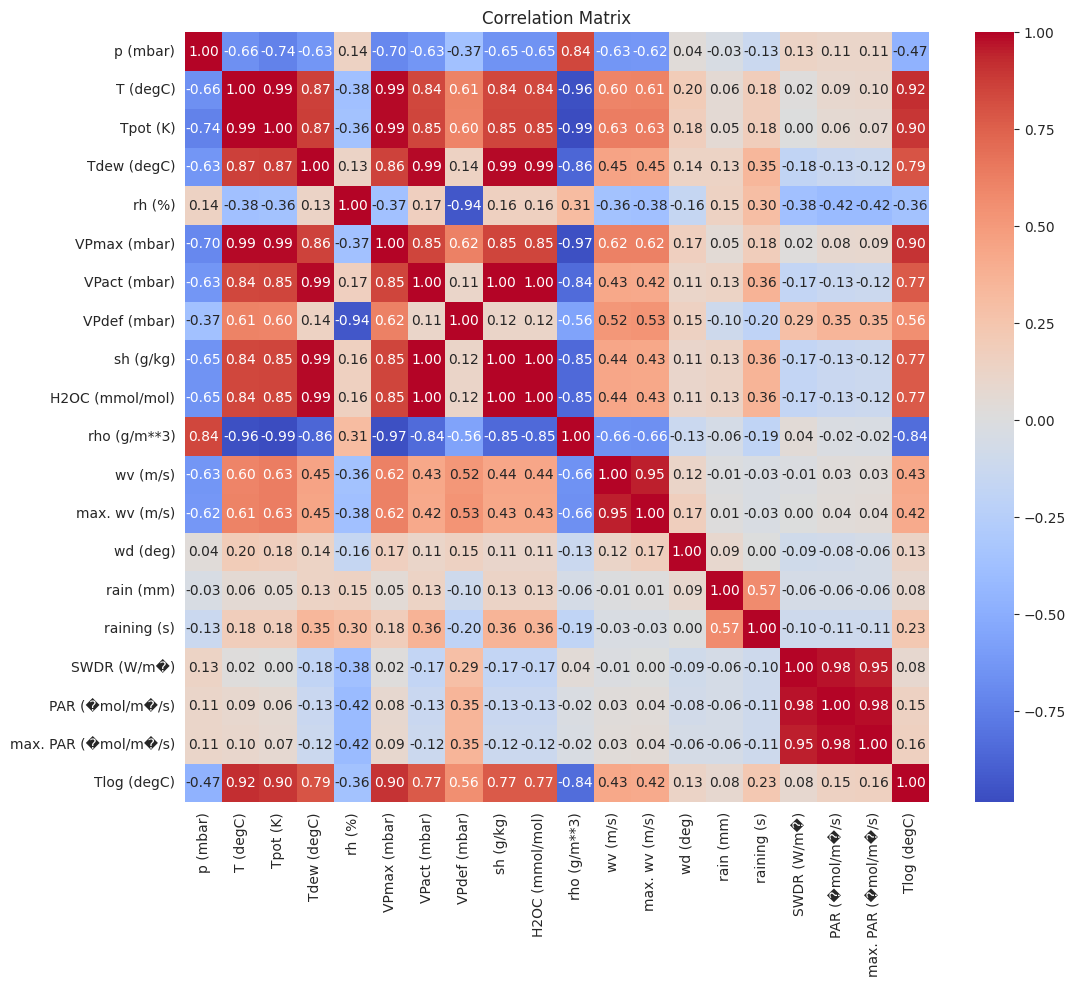

Highly correlated pairs (|corr| > 0.8):
p (mbar) vs rho (g/m**3): 0.84
T (degC) vs Tpot (K): 0.99
T (degC) vs Tdew (degC): 0.87
T (degC) vs VPmax (mbar): 0.99
T (degC) vs VPact (mbar): 0.84
T (degC) vs sh (g/kg): 0.84
T (degC) vs H2OC (mmol/mol): 0.84
T (degC) vs rho (g/m**3): -0.96
T (degC) vs Tlog (degC): 0.92
Tpot (K) vs Tdew (degC): 0.87
Tpot (K) vs VPmax (mbar): 0.99
Tpot (K) vs VPact (mbar): 0.85
Tpot (K) vs sh (g/kg): 0.85
Tpot (K) vs H2OC (mmol/mol): 0.85
Tpot (K) vs rho (g/m**3): -0.99
Tpot (K) vs Tlog (degC): 0.90
Tdew (degC) vs VPmax (mbar): 0.86
Tdew (degC) vs VPact (mbar): 0.99
Tdew (degC) vs sh (g/kg): 0.99
Tdew (degC) vs H2OC (mmol/mol): 0.99
Tdew (degC) vs rho (g/m**3): -0.86
rh (%) vs VPdef (mbar): -0.94
VPmax (mbar) vs VPact (mbar): 0.85
VPmax (mbar) vs sh (g/kg): 0.85
VPmax (mbar) vs H2OC (mmol/mol): 0.85
VPmax (mbar) vs rho (g/m**3): -0.97
VPmax (mbar) vs Tlog (degC): 0.90
VPact (mbar) vs sh (g/kg): 1.00
VPact (mbar) vs H2OC (mmol/mol): 1.00
VPact (mbar) vs rho (g/m

In [21]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Find highly correlated pairs (|corr| > 0.8)
high_corr = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.8:
            high_corr.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

print("Highly correlated pairs (|corr| > 0.8):")
for pair in high_corr:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.2f}")

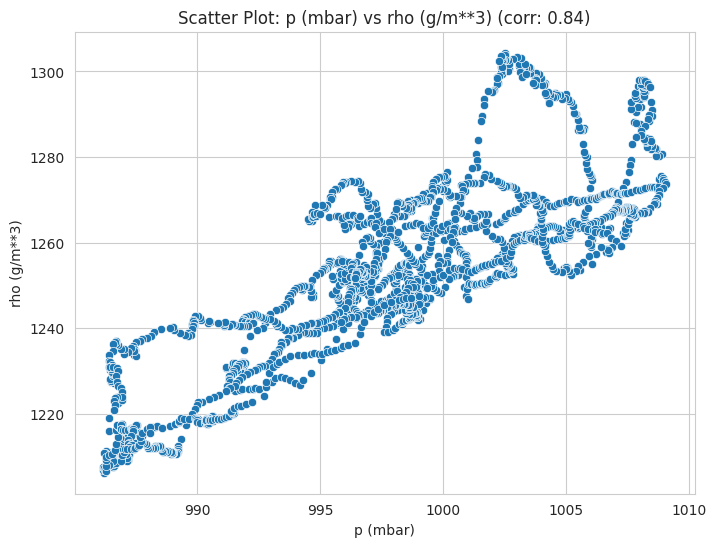

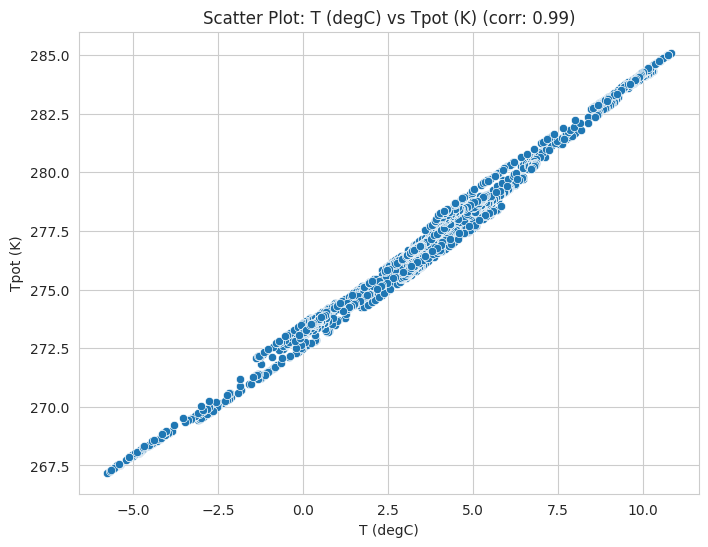

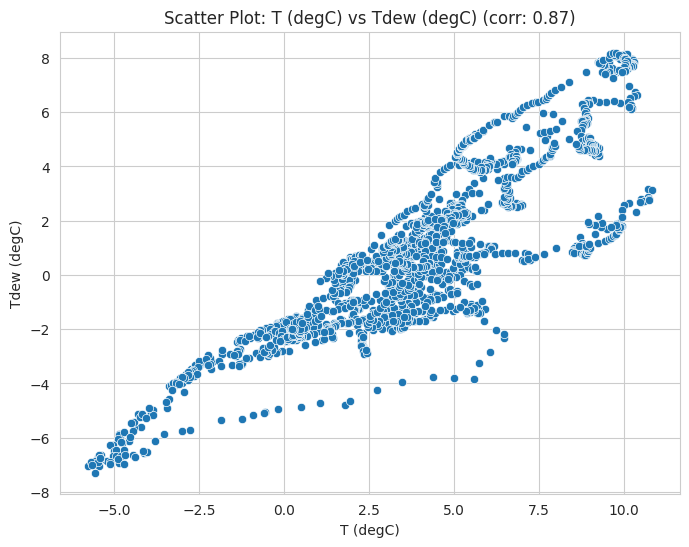

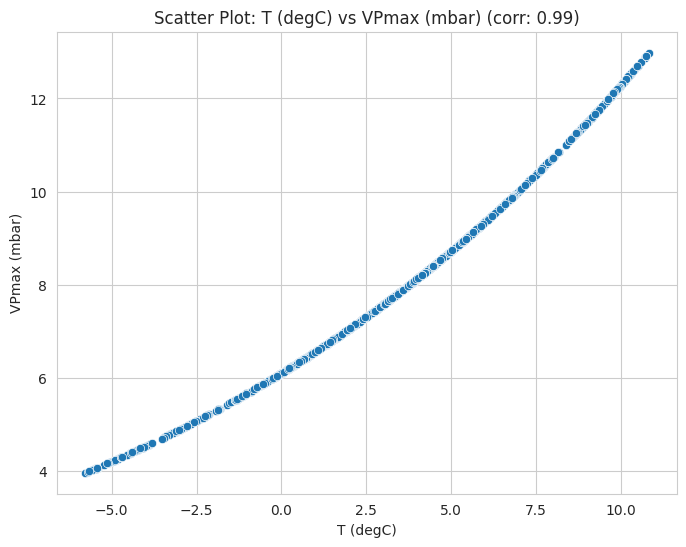

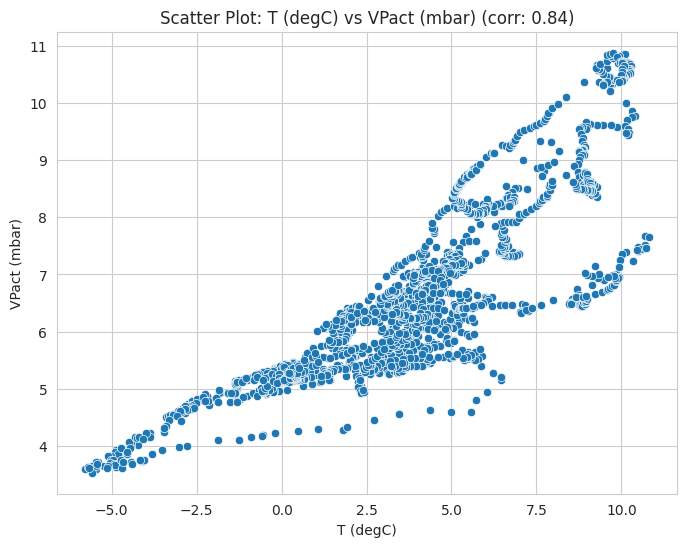

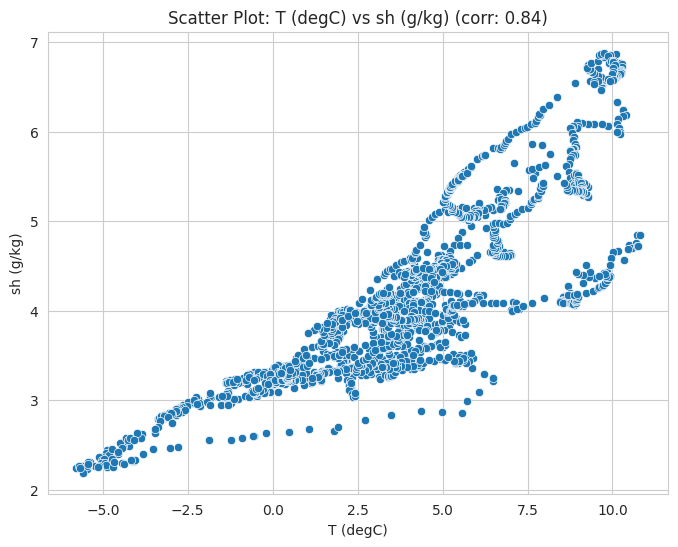

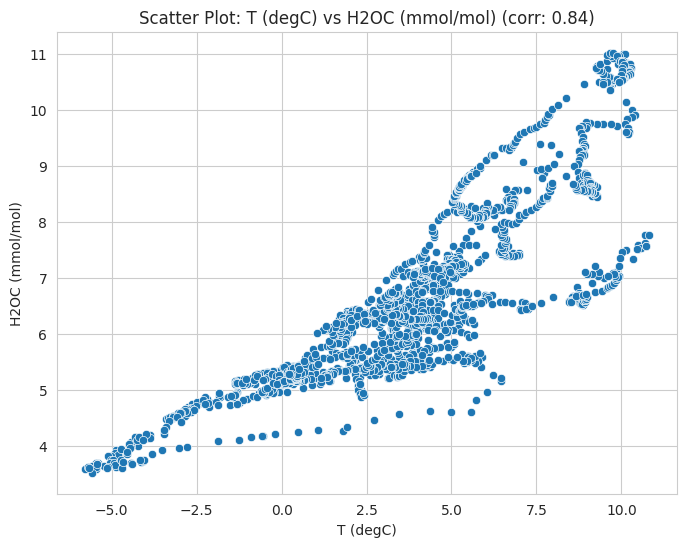

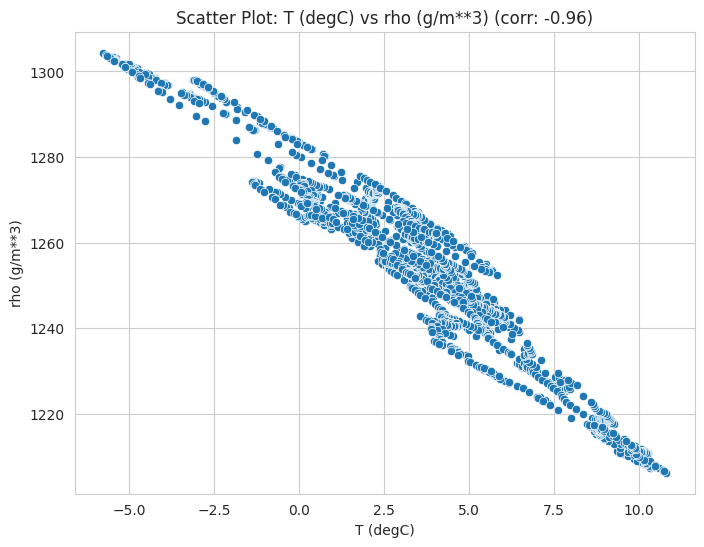

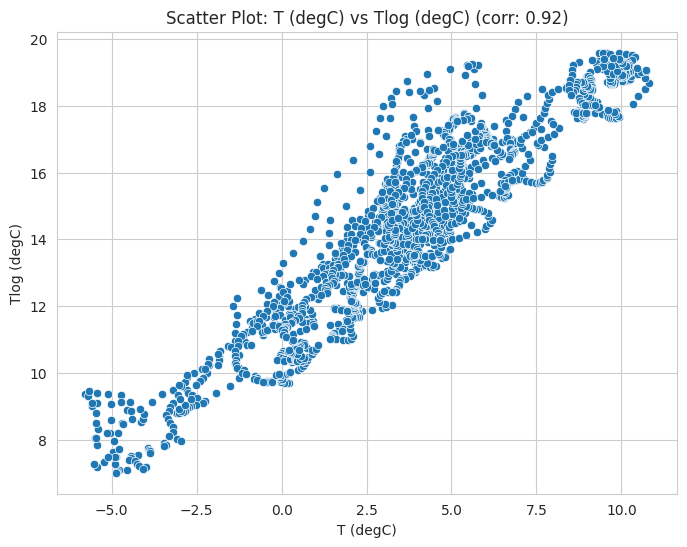

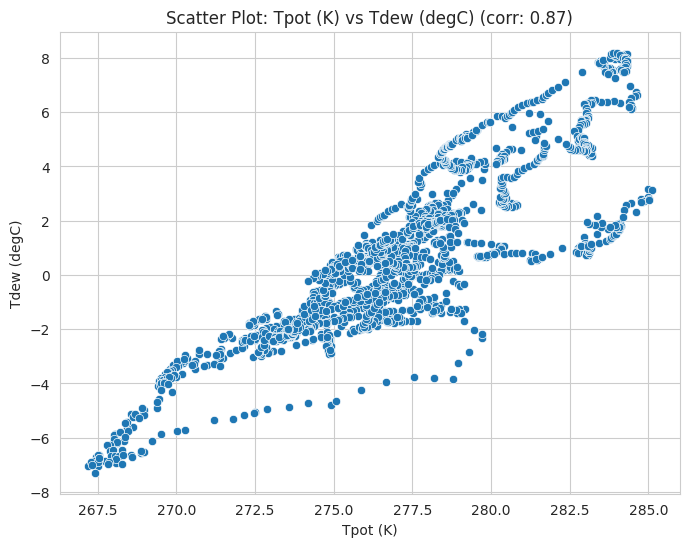

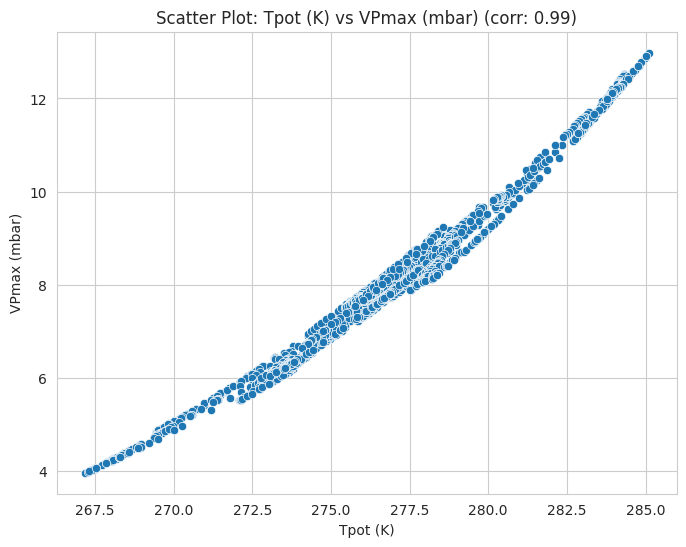

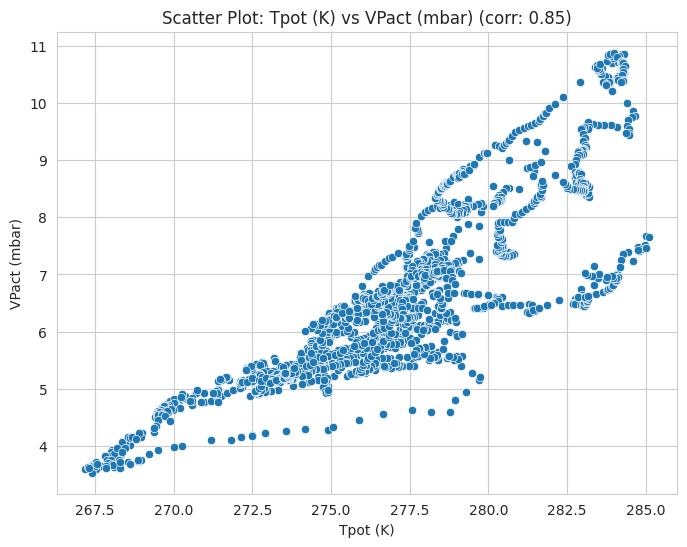

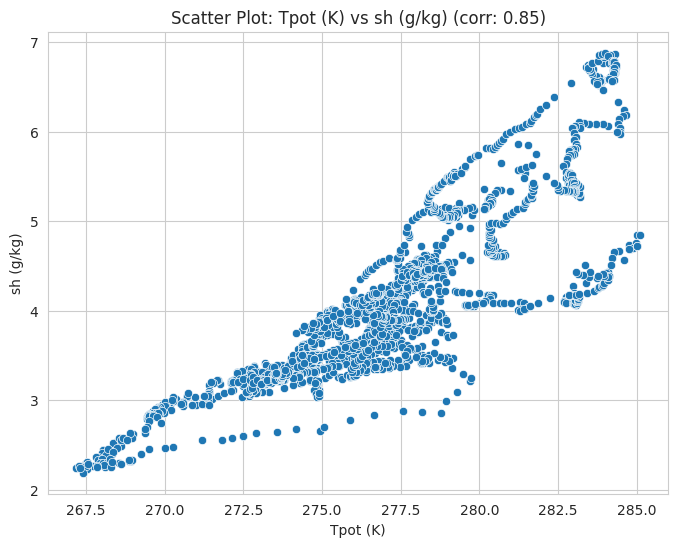

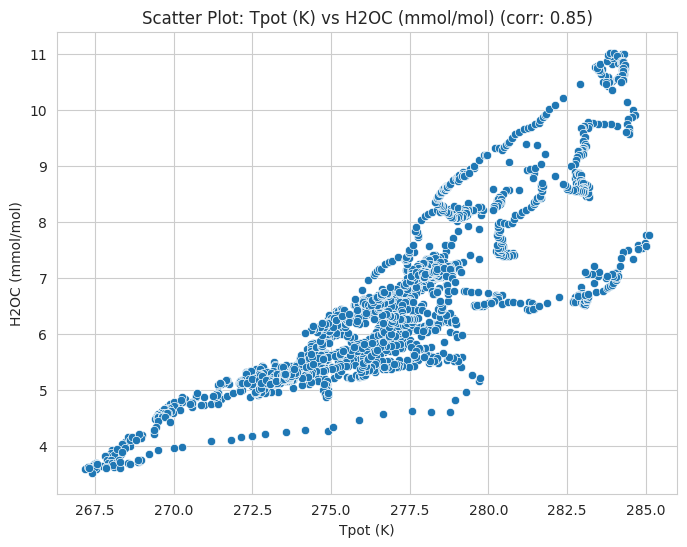

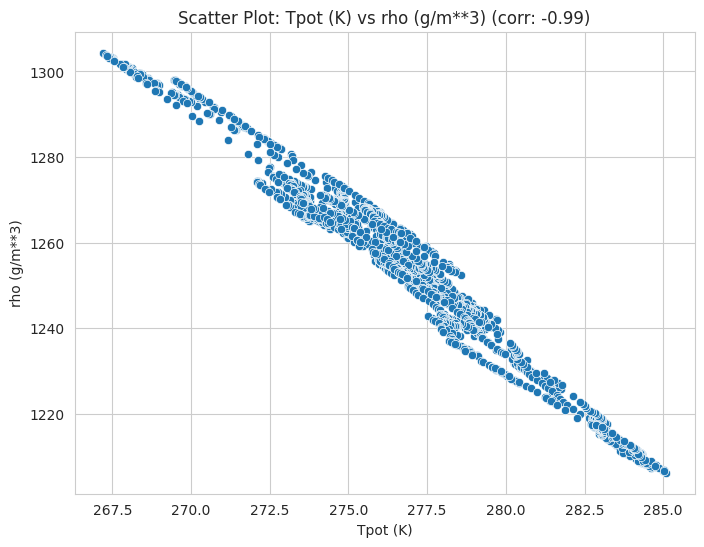

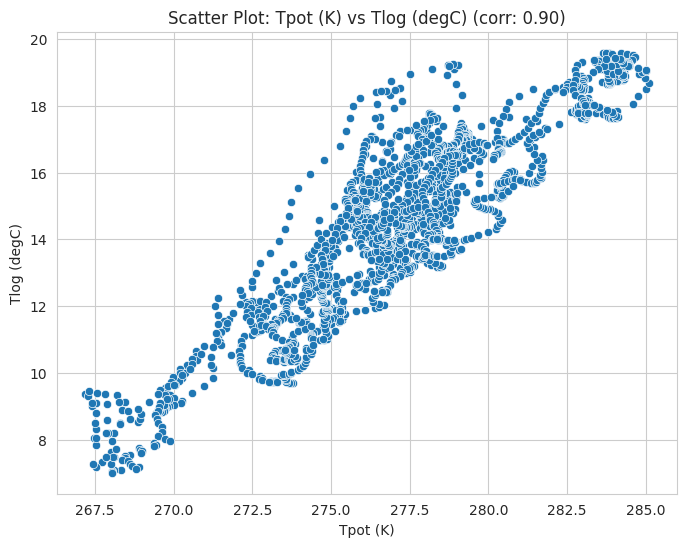

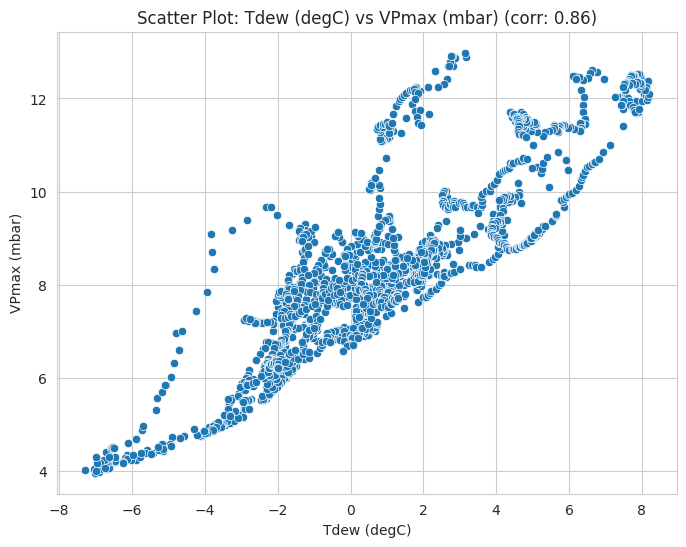

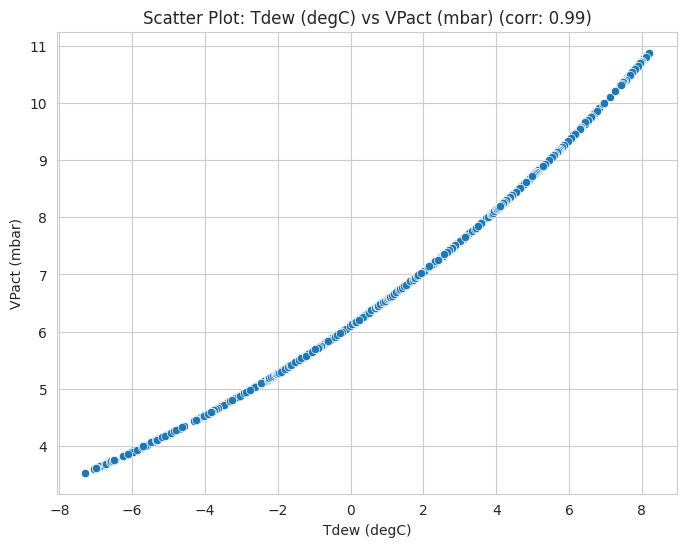

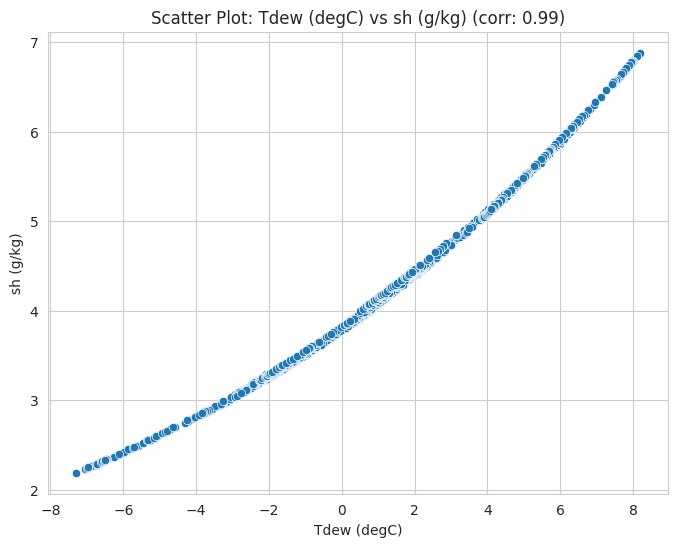

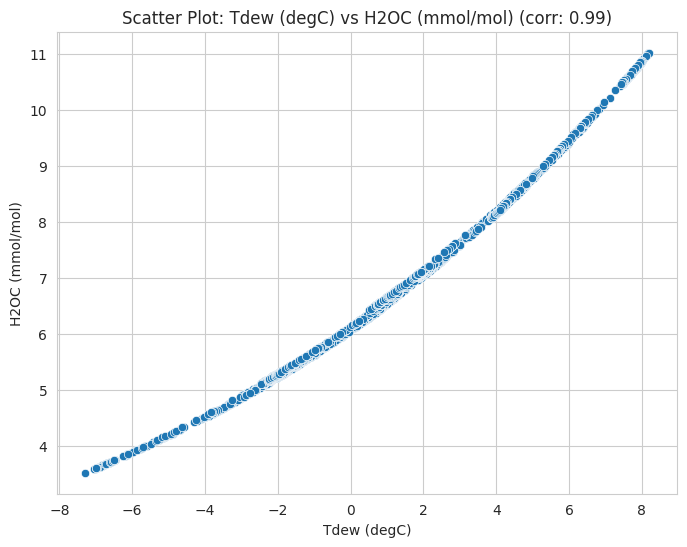

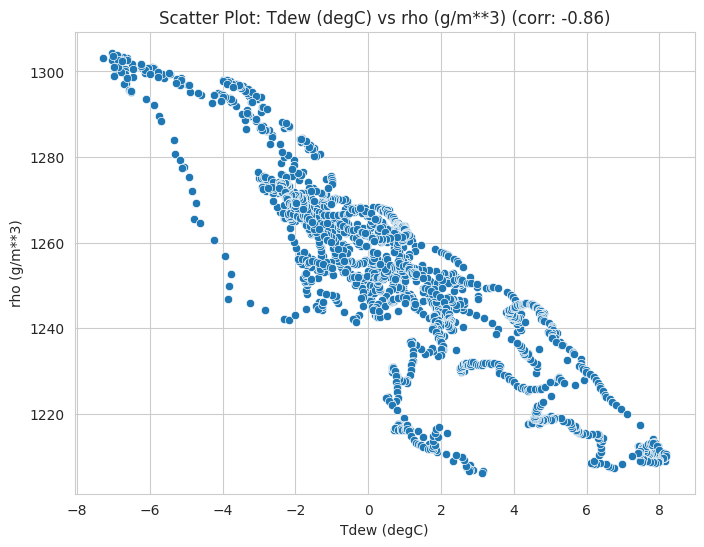

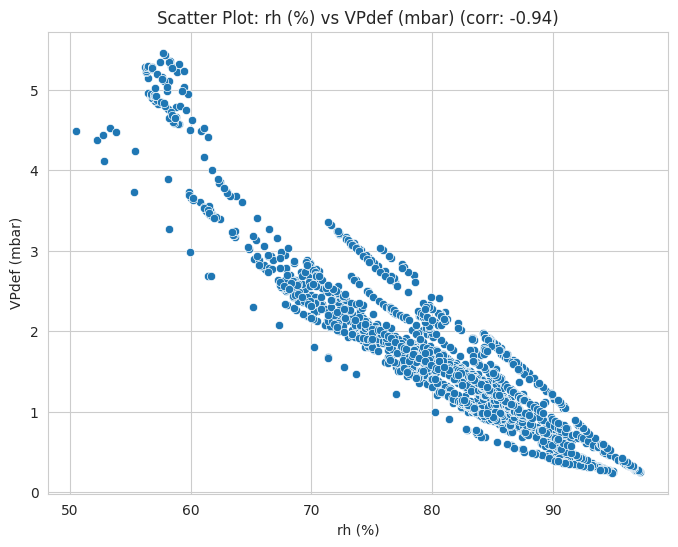

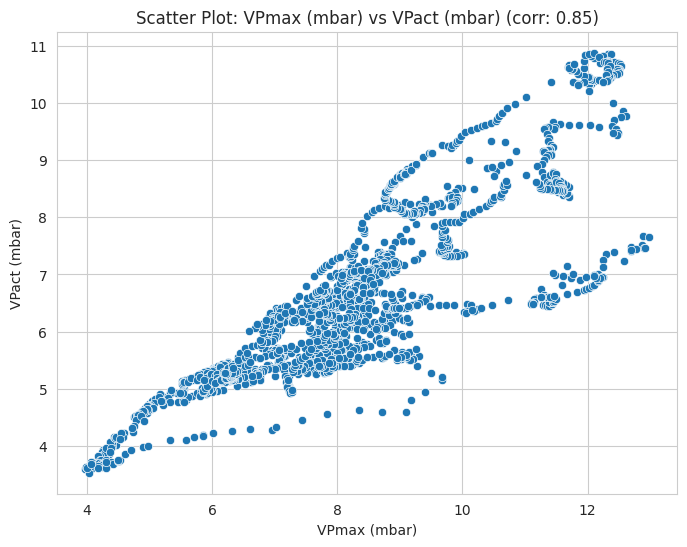

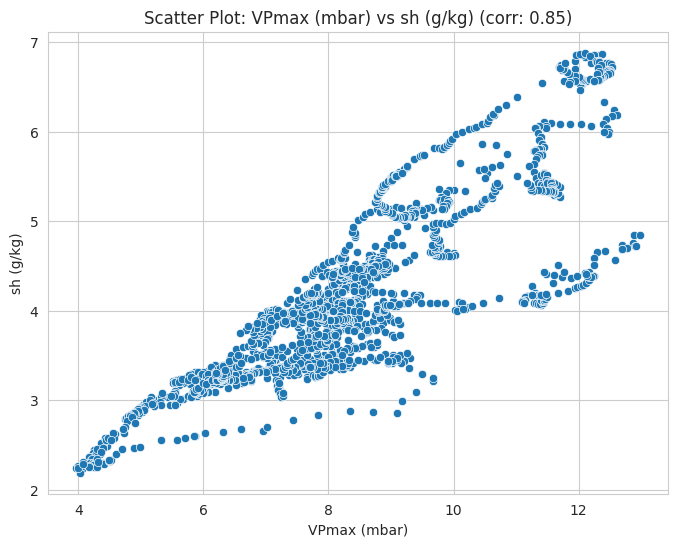

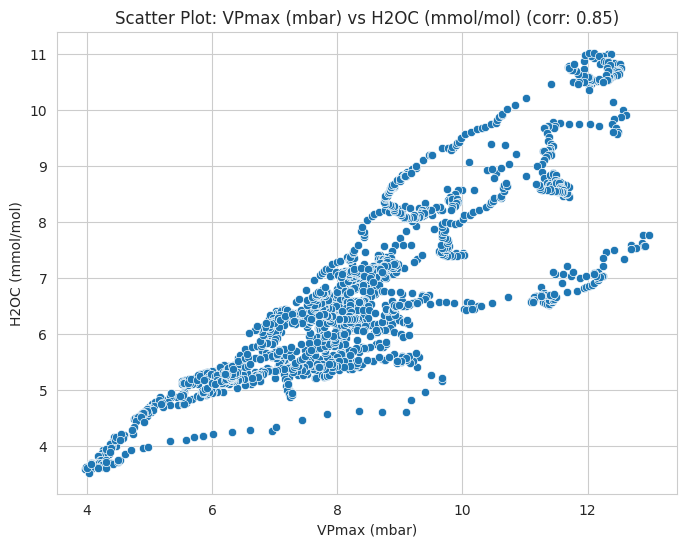

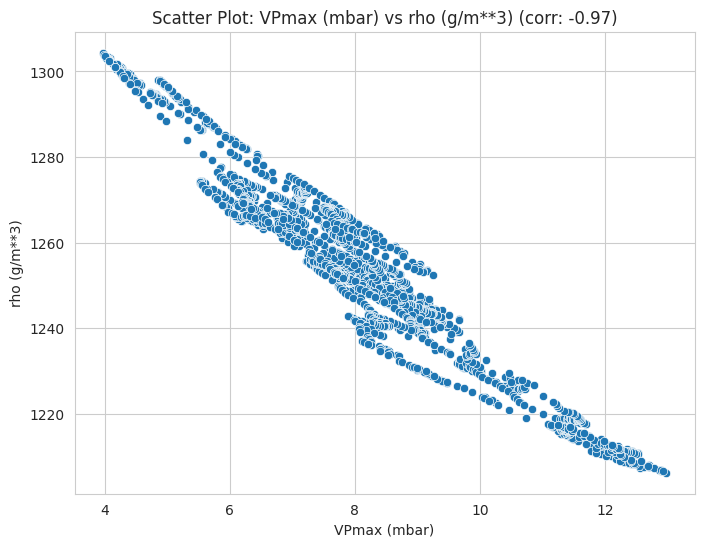

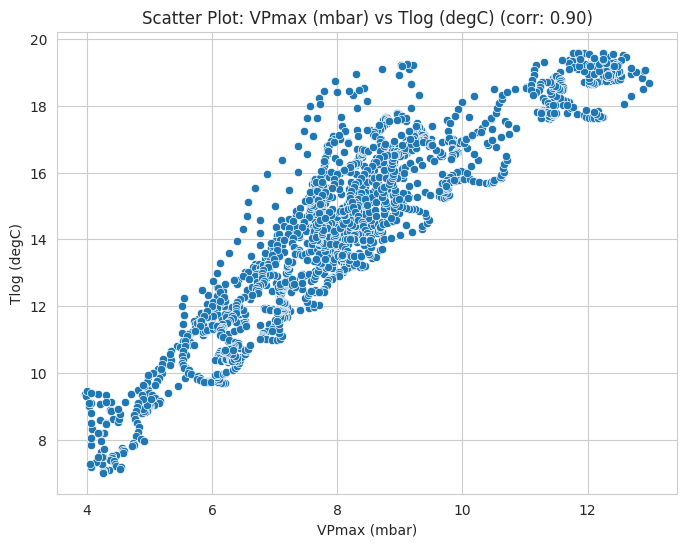

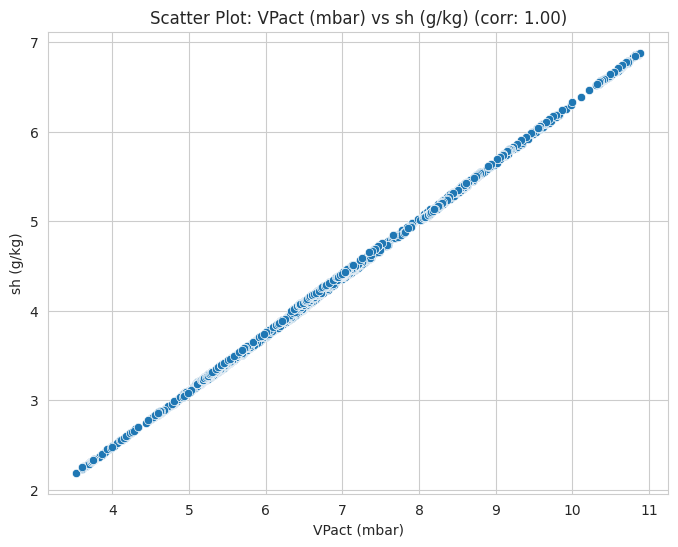

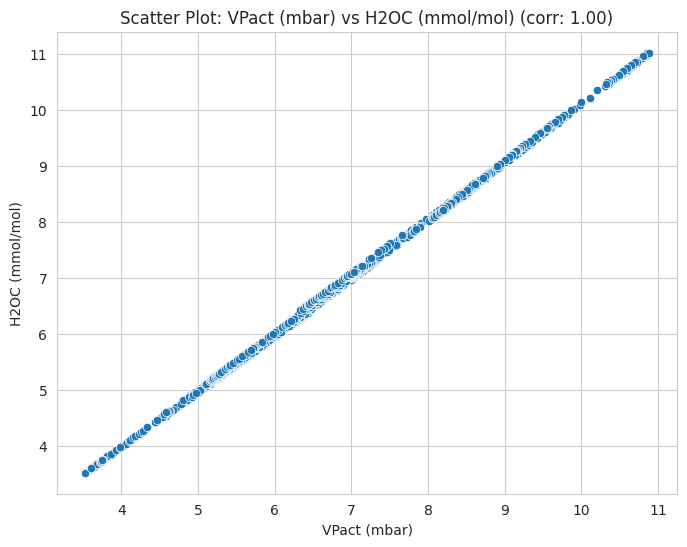

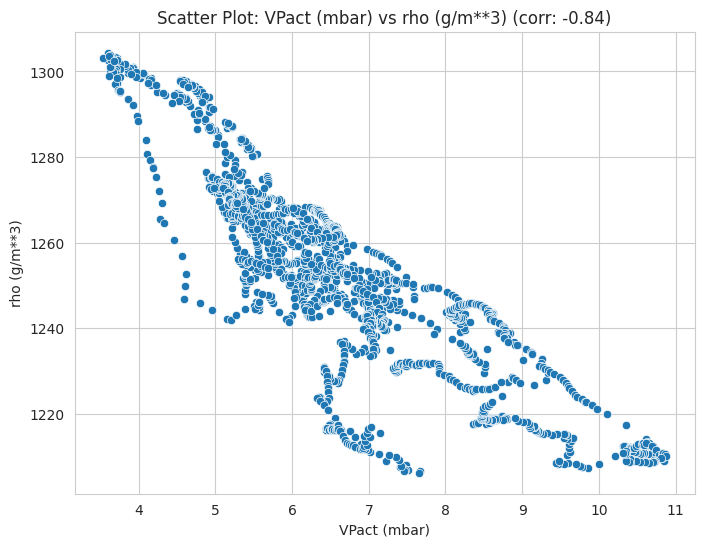

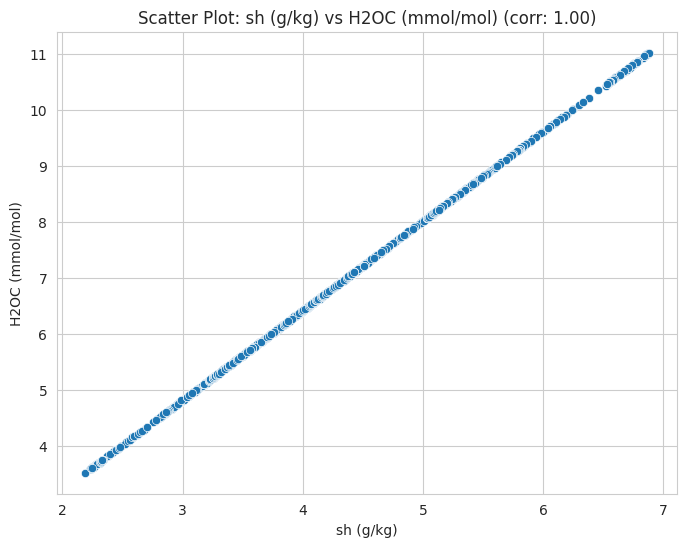

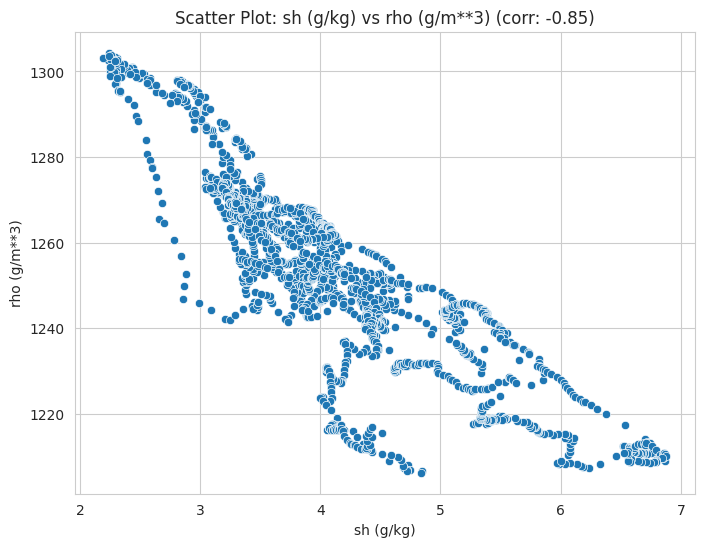

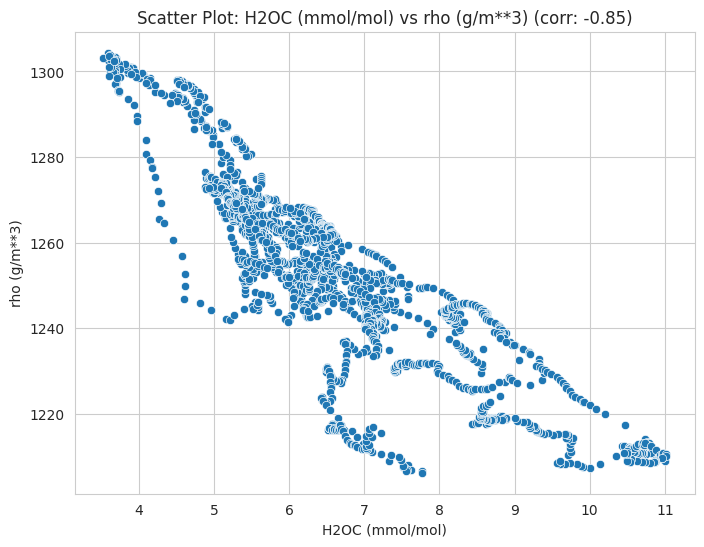

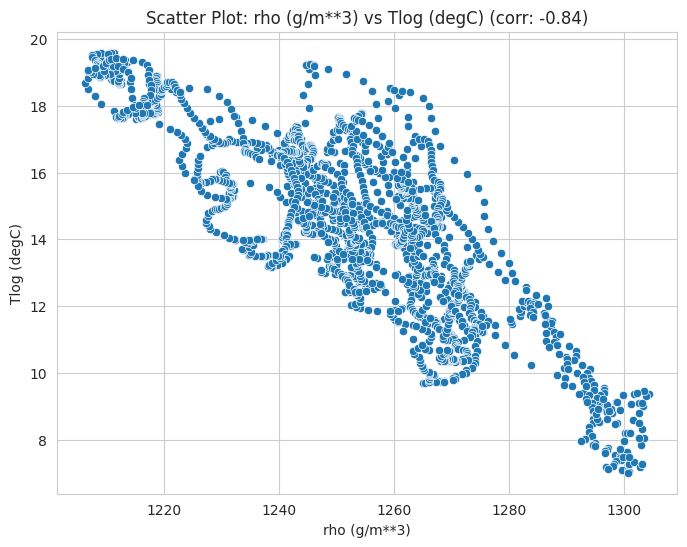

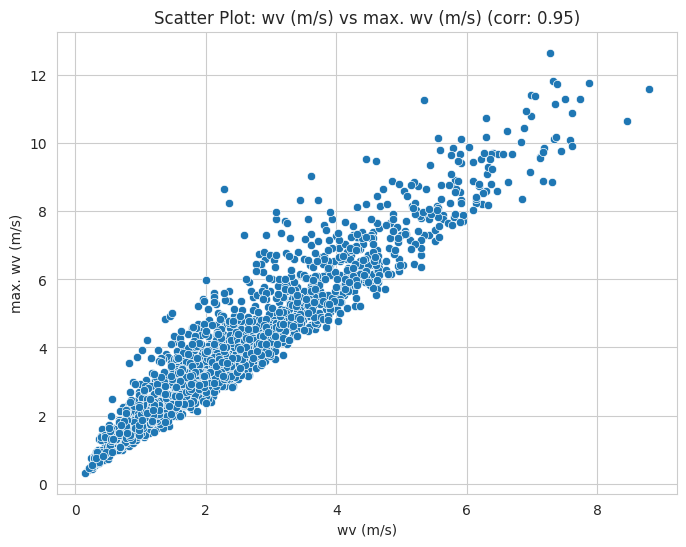

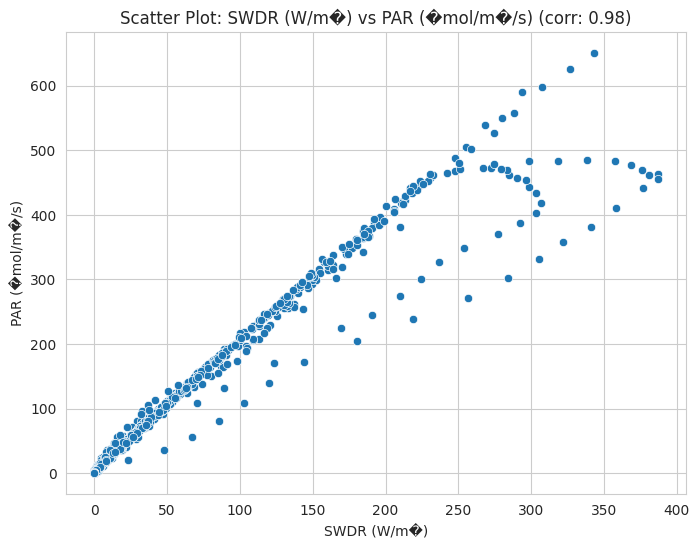

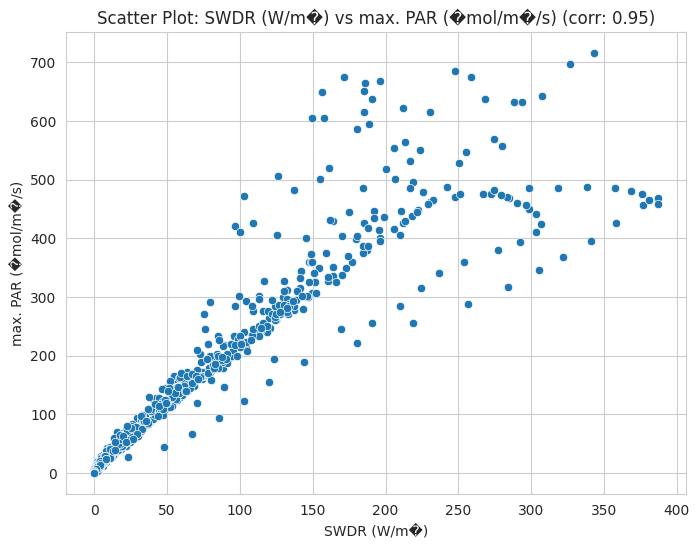

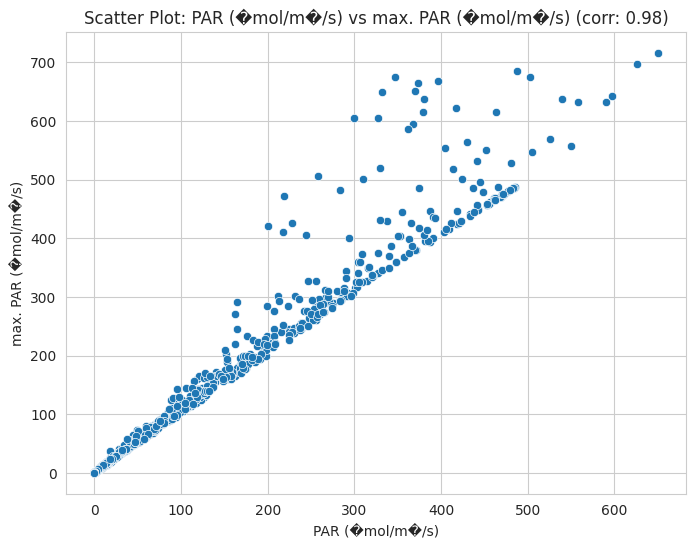

In [22]:
# Scatter plots for highly correlated pairs
for pair in high_corr:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[pair[0]], y=df[pair[1]])
    plt.title(f'Scatter Plot: {pair[0]} vs {pair[1]} (corr: {pair[2]:.2f})')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()